<h3>For More Details</h3>https://www.kaggle.com/brsdincer/genomes-and-genetics-disorder-prediction-ii#PREDICTION-PROCESS-II

# Task 1 - Importing libraries and dataset

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

import numpy as np

%matplotlib inline 
# setting Matplotlib to plot inline, which means that the outputted plot will appear immediately under each code cell
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.monospace'] = 'Ubunto Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (16,10)

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(r"train.csv")
df_test = pd.read_csv(r"test.csv")
df.head(10)

Patient Id  Patient Age Genes in mother's side Inherited from father Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name Family Name Father's name  Mother's age  Father's age                              Institute Name                              Location of Institute    Status Respiratory Rate (breaths/min) Heart Rate (rates/min  Test 1  Test 2  Test 3  Test 4  Test 5  \
0  PID0x6418         2.00                    Yes                    No           Yes            No                    4.76            Richard         NaN         Larre           nan           nan  Boston Specialty & Rehabilitation Hospital  55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...     Alive                 Normal (30-60)                Normal    0.00     nan     nan    1.00    0.00   
1  PID0x25d5         4.00                    Yes                   Yes            No            No                    4.91               Mike         NaN        Brycen           nan         23.00           St. Margaret's Hospital For Women  1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...  Deceased                      Tachypnea                Normal     nan    0.00    0.00    1.00    0.00   
2  PID0x4a82         6.00                    Yes                    No            No            No                    4.89           Kimberly         NaN        Nashon         41.00         22.00                                         NaN                                                  -     Alive                 Normal (30-60)           Tachycardia    0.00    0.00    0.00    1.00    0.00   
3  PID0x4ac8        12.00                    Yes                    No           Yes            No                    4.71            Jeffery   Hoelscher        Aayaan         21.00           nan                                         NaN  55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...  Deceased                      Tachypnea                Normal    0.00    0.00    0.00    1.00    0.00   
4  PID0x1bf7        11.00                    Yes                    No           NaN           Yes                    4.72            Johanna    Stutzman         Suave         32.00           nan                             Carney Hospital  300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...     Alive                      Tachypnea           Tachycardia    0.00    0.00    0.00    1.00    0.00   
5  PID0x44fe        14.00                    Yes                    No           Yes            No                    5.10            Richard         NaN      Coleston           nan           nan              Massachusetts General Hospital  55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...  Deceased                            NaN                Normal    0.00    0.00    0.00    1.00    0.00   
6  PID0x28de         3.00                    Yes                    No           Yes           Yes                    4.90               Mary         NaN         Aydun           nan         63.00                              Not applicable                                                  -     Alive                 Normal (30-60)                   NaN     nan    0.00    0.00    1.00    0.00   
7  PID0x4f8f         3.00                     No                    No           Yes           Yes                    4.96               Emma      Bryant          Keng         40.00           nan                              Not applicable                                                  -     Alive                      Tachypnea                Normal    0.00    0.00     nan    1.00    0.00   
8  PID0x8ce3        11.00                     No                    No           Yes            No                    5.21             Willie     Camacho            Tr         45.00         44.00                    Lemuel Shattuck Hospital  125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...     Alive                      Tachypnea           Tachycardia    0.00    0.00    0.00    1.00    0.00   
9  PID0x8660         4.00       

In [3]:
df_test

Patient Id  Patient Age Genes in mother's side Inherited from father Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name Family Name Father's name  Mother's age  Father's age                              Institute Name                              Location of Institute    Status Respiratory Rate (breaths/min) Heart Rate (rates/min  Test 1  Test 2  Test 3  Test 4  Test 5  \
0     PID0x4175            6                     No                   Yes            No            No                    4.98            Charles         NaN          Kore            38            61                    St. Elizabeth's Hospital  30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42....     Alive                      Tachypnea                Normal       0     -99       0       1       0   
1     PID0x21f5           10                    Yes                    No           NaN           Yes                    5.12          Catherine         NaN        Homero            33            53                                         -99  249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...     Alive                            NaN                   -99       0       0     -99       1     -99   
2     PID0x49b8            5                     No                   NaN            No            No                    4.88              James         NaN       Danield            48            60                                         NaN  1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....  Deceased                            NaN                Normal       0       0       0       1       0   
3     PID0x2d97           13                     No                   Yes           Yes            No                    4.69              Brian         NaN       Orville            25            55  Boston Specialty & Rehabilitation Hospital  51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...     Alive                            -99                   -99       0       0       0       1       0   
4     PID0x58da            5                     No                   NaN           NaN           Yes                    5.15               Gary         NaN        Issiah            41            38                              Not applicable                                                  -  Deceased                      Tachypnea                   NaN       0       0       0       1       0   
...         ...          ...                    ...                   ...           ...           ...                     ...                ...         ...           ...           ...           ...                                         ...                                                ...       ...                            ...                   ...     ...     ...     ...     ...     ...   
9460  PID0x81e1            9                    Yes                   Yes           NaN            No                    4.88          Francisco         NaN      Artavian            28            63                                         NaN  51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...     Alive                            -99                   NaN     -99       0     -99       1     -99   
9461  PID0x3514            1                    Yes                    No           NaN           Yes                    4.93              James         NaN         Nasir            37            62                                         -99  125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...  Deceased                            -99                   -99       0       0     -99       1     -99   
9462  PID0x5408            2                     No                   Yes            No            No                    4.90            Rebecca         NaN      Jatorian            24            32           St. Margaret's Hospital For Women  170 MORTON ST\nROSLINDALE, MA 02130\n(42.30025...  Deceased                      Tachypnea           Tachycardia     -99       0       0       1       0   
9463 

# Task 2 - Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        9465 non-null   object 
 1   Patient Age                                       9465 non-null   int64  
 2   Genes in mother's side                            9465 non-null   object 
 3   Inherited from father                             8914 non-null   object 
 4   Maternal gene                                     5742 non-null   object 
 5   Paternal gene                                     9465 non-null   object 
 6   Blood cell count (mcL)                            9465 non-null   float64
 7   Patient First Name                                9465 non-null   object 
 8   Family Name                                       148 non-null    object 
 9   Father's name      

In [6]:
df.nunique()

Patient Id                                          22083
Patient Age                                            15
Genes in mother's side                                  2
Inherited from father                                   2
Maternal gene                                           2
Paternal gene                                           2
Blood cell count (mcL)                              22083
Patient First Name                                   2524
Family Name                                          6282
Father's name                                       16368
Mother's age                                           34
Father's age                                           45
Institute Name                                         27
Location of Institute                                  26
Status                                                  2
Respiratory Rate (breaths/min)                          2
Heart Rate (rates/min                                   2
Test 1        

In [7]:
df_test.nunique()

Patient Id                                          9465
Patient Age                                           15
Genes in mother's side                                 2
Inherited from father                                  2
Maternal gene                                          2
Paternal gene                                          2
Blood cell count (mcL)                              9465
Patient First Name                                  1688
Family Name                                          141
Father's name                                       8301
Mother's age                                          34
Father's age                                          45
Institute Name                                        28
Location of Institute                                 26
Status                                                 2
Respiratory Rate (breaths/min)                         3
Heart Rate (rates/min                                  3
Test 1                         

<AxesSubplot:>

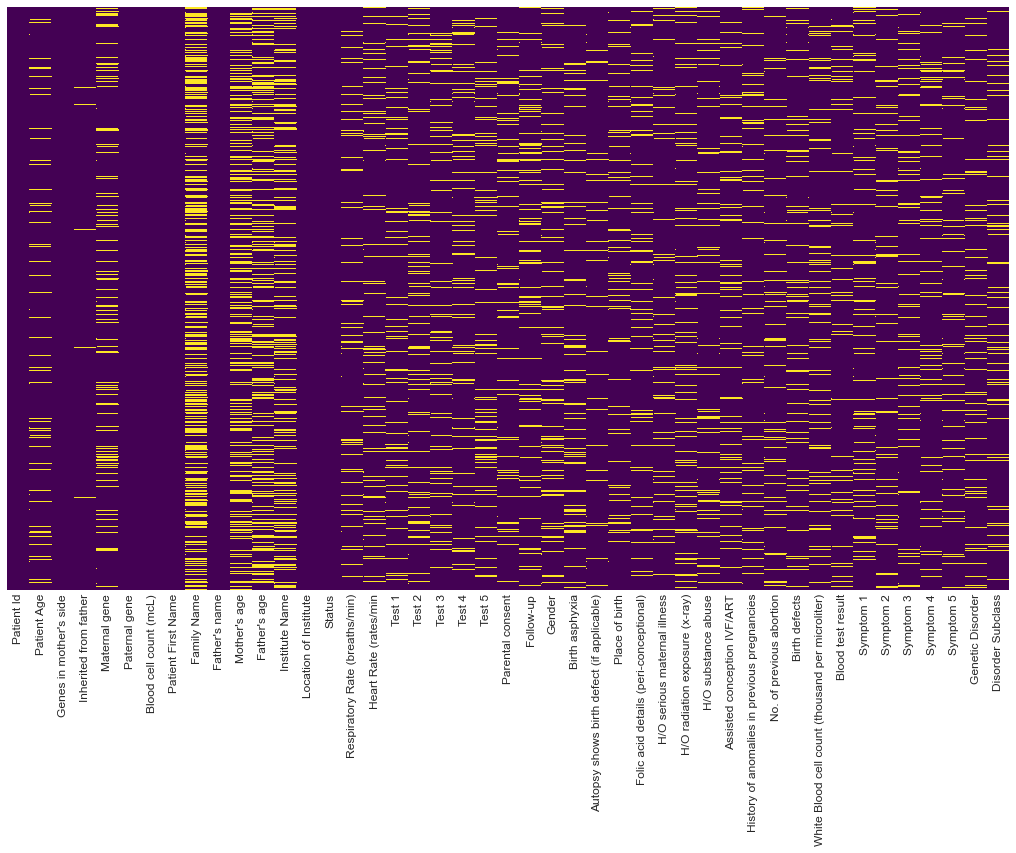

In [8]:
## Missing values in train dataset
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

In [9]:
df.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

<AxesSubplot:>

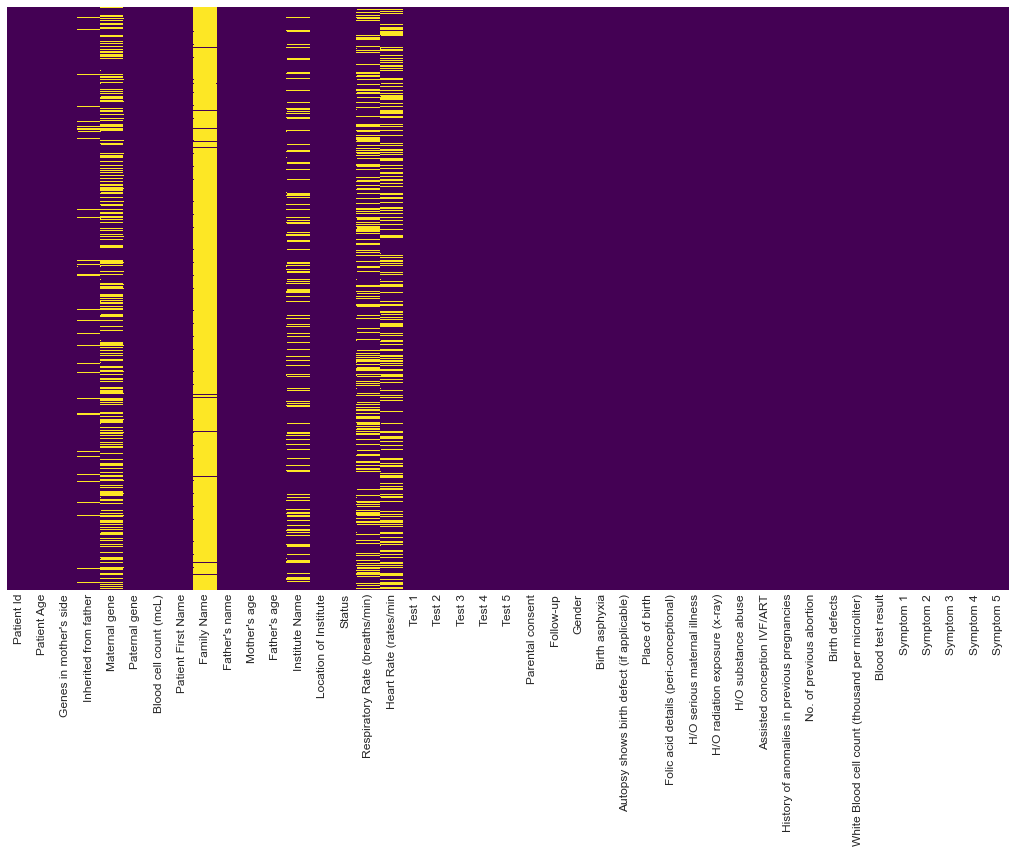

In [10]:
## Missing values in train dataset
sns.heatmap(df_test.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

In [11]:
df_test.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                551
Maternal gene                                       3723
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9317
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      2036
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2886
Heart Rate (rates/min                               2900
Test 1                         

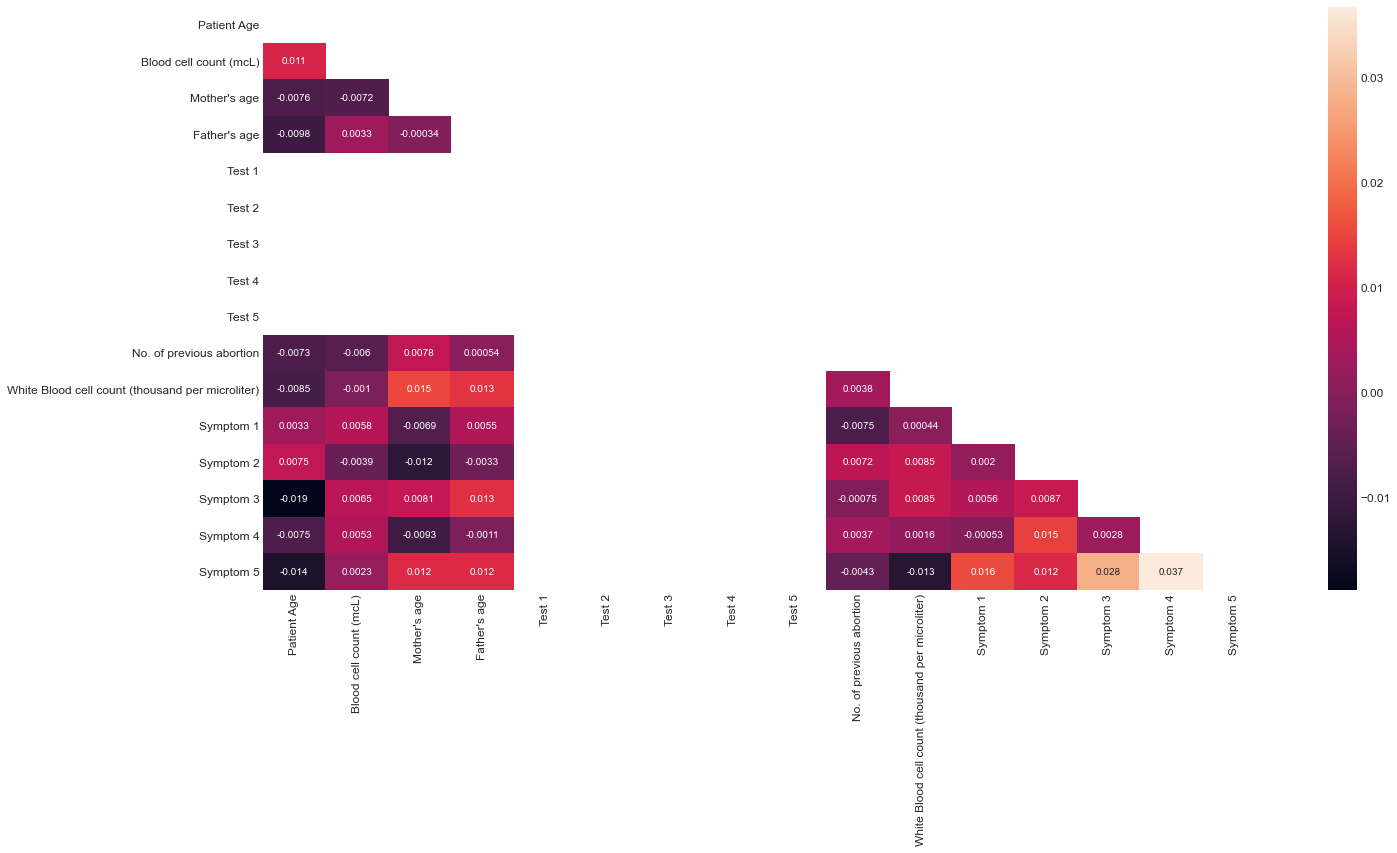

In [12]:
corr = df.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

From the above plot, features "<b>Symptom 4</b>" and "<b>Symptom 5</b>" are highly correlated and therefore we will be dropping one of them in the end.

In [13]:
## Spliting the train dataset into categorical and numerical features
def getFeatures(df):
    num_features = df.select_dtypes(include=[np.number])
    cat_features = df.select_dtypes(include=[np.object])
    return num_features,cat_features

In [14]:
num_features,cat_features = getFeatures(df)
num_test_features, cat_test_features = getFeatures(df_test)

In [15]:
num_features

Patient Age  Blood cell count (mcL)  Mother's age  Father's age  Test 1  Test 2  Test 3  Test 4  Test 5  No. of previous abortion  White Blood cell count (thousand per microliter)  Symptom 1  Symptom 2  Symptom 3  Symptom 4  Symptom 5
0             2.00                    4.76           nan           nan    0.00     nan     nan    1.00    0.00                       nan                                              9.86       1.00       1.00       1.00       1.00       1.00
1             4.00                    4.91           nan         23.00     nan    0.00    0.00    1.00    0.00                       nan                                              5.52       1.00        nan       1.00       1.00       0.00
2             6.00                    4.89         41.00         22.00    0.00    0.00    0.00    1.00    0.00                      4.00                                               nan       0.00       1.00       1.00       1.00       1.00
3            12.00                    4.71         21.00           nan    0.00    0.00    0.00    1.00    0.00                      1.00                                              7.92       0.00       0.00       1.00       0.00       0.00
4            11.00                    4.72         32.00           nan    0.00    0.00    0.00    1.00    0.00                      4.00                                              4.10       0.00       0.00       0.00       0.00        nan
...            ...                     ...           ...           ...     ...     ...     ...     ...     ...                       ...                                               ...        ...        ...        ...        ...        ...
22078         4.00                    5.26         35.00         64.00     nan    0.00     nan    1.00    0.00                      3.00                                              6.58       0.00       0.00       1.00       0.00       0.00
22079         8.00                    4.97           nan         56.00     nan    0.00     nan    1.00     nan                      2.00                                              7.04       1.00       1.00       1.00       1.00       0.00
22080         8.00                    5.19         35.00         51.00    0.00    0.00    0.00    1.00     nan                      2.00                                              7.72       0.00       0.00       0.00       1.00        nan
22081         7.00                    4.86         19.00           nan    0.00    0.00    0.00    1.00    0.00                      1.00                                              8.44       1.00       1.00       1.00       0.00       0.00
22082        11.00                    4.74         32.00         62.00    0.00    0.00    0.00    1.00    0.00                      4.00                                             11.19       1.00       0.00       1.00       1.00       1.00

[22083 rows x 16 columns]

In [16]:
cat_features

Patient Id Genes in mother's side Inherited from father Maternal gene Paternal gene Patient First Name Family Name Father's name                              Institute Name                              Location of Institute    Status Respiratory Rate (breaths/min) Heart Rate (rates/min Parental consent Follow-up     Gender Birth asphyxia Autopsy shows birth defect (if applicable)  \
0      PID0x6418                    Yes                    No           Yes            No            Richard         NaN         Larre  Boston Specialty & Rehabilitation Hospital  55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...     Alive                 Normal (30-60)                Normal              Yes      High        NaN            NaN                             Not applicable   
1      PID0x25d5                    Yes                   Yes            No            No               Mike         NaN        Brycen           St. Margaret's Hospital For Women  1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...  Deceased                      Tachypnea                Normal              Yes      High        NaN             No                                       None   
2      PID0x4a82                    Yes                    No            No            No           Kimberly         NaN        Nashon                                         NaN                                                  -     Alive                 Normal (30-60)           Tachycardia              Yes       Low        NaN      No record                             Not applicable   
3      PID0x4ac8                    Yes                    No           Yes            No            Jeffery   Hoelscher        Aayaan                                         NaN  55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...  Deceased                      Tachypnea                Normal              Yes      High       Male  Not available                                         No   
4      PID0x1bf7                    Yes                    No           NaN           Yes            Johanna    Stutzman         Suave                             Carney Hospital  300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...     Alive                      Tachypnea           Tachycardia              NaN       Low       Male  Not available                             Not applicable   
...          ...                    ...                   ...           ...           ...                ...         ...           ...                                         ...                                                ...       ...                            ...                   ...              ...       ...        ...            ...                                        ...   
22078  PID0x5598                    Yes                   Yes           Yes            No               Lynn         NaN     Alhassane             Franciscan Children's  Hospital  1153 CENTRE ST\nJAMAICA PLAIN, MA 02130\n(42.3...  Deceased                 Normal (30-60)           Tachycardia              Yes      High     Female             No                                         No   
22079  PID0x19cb                     No                   Yes            No           Yes            Matthew      Farley     Dartanion                           Faulkner Hospital  170 MORTON ST\nROSLINDALE, MA 02130\n(42.30025...     Alive                 Normal (30-60)                Normal              NaN      High  Ambiguous             No                             Not applicable   
22080  PID0x3c4f                    Yes                    No           Yes            No               John         NaN        Cavani                              Not applicable                                                  -  Deceased                      Tachypnea                Normal              Yes      High       Male             No                                       None   
22081   PID0x13a                    Yes                    No           Yes           

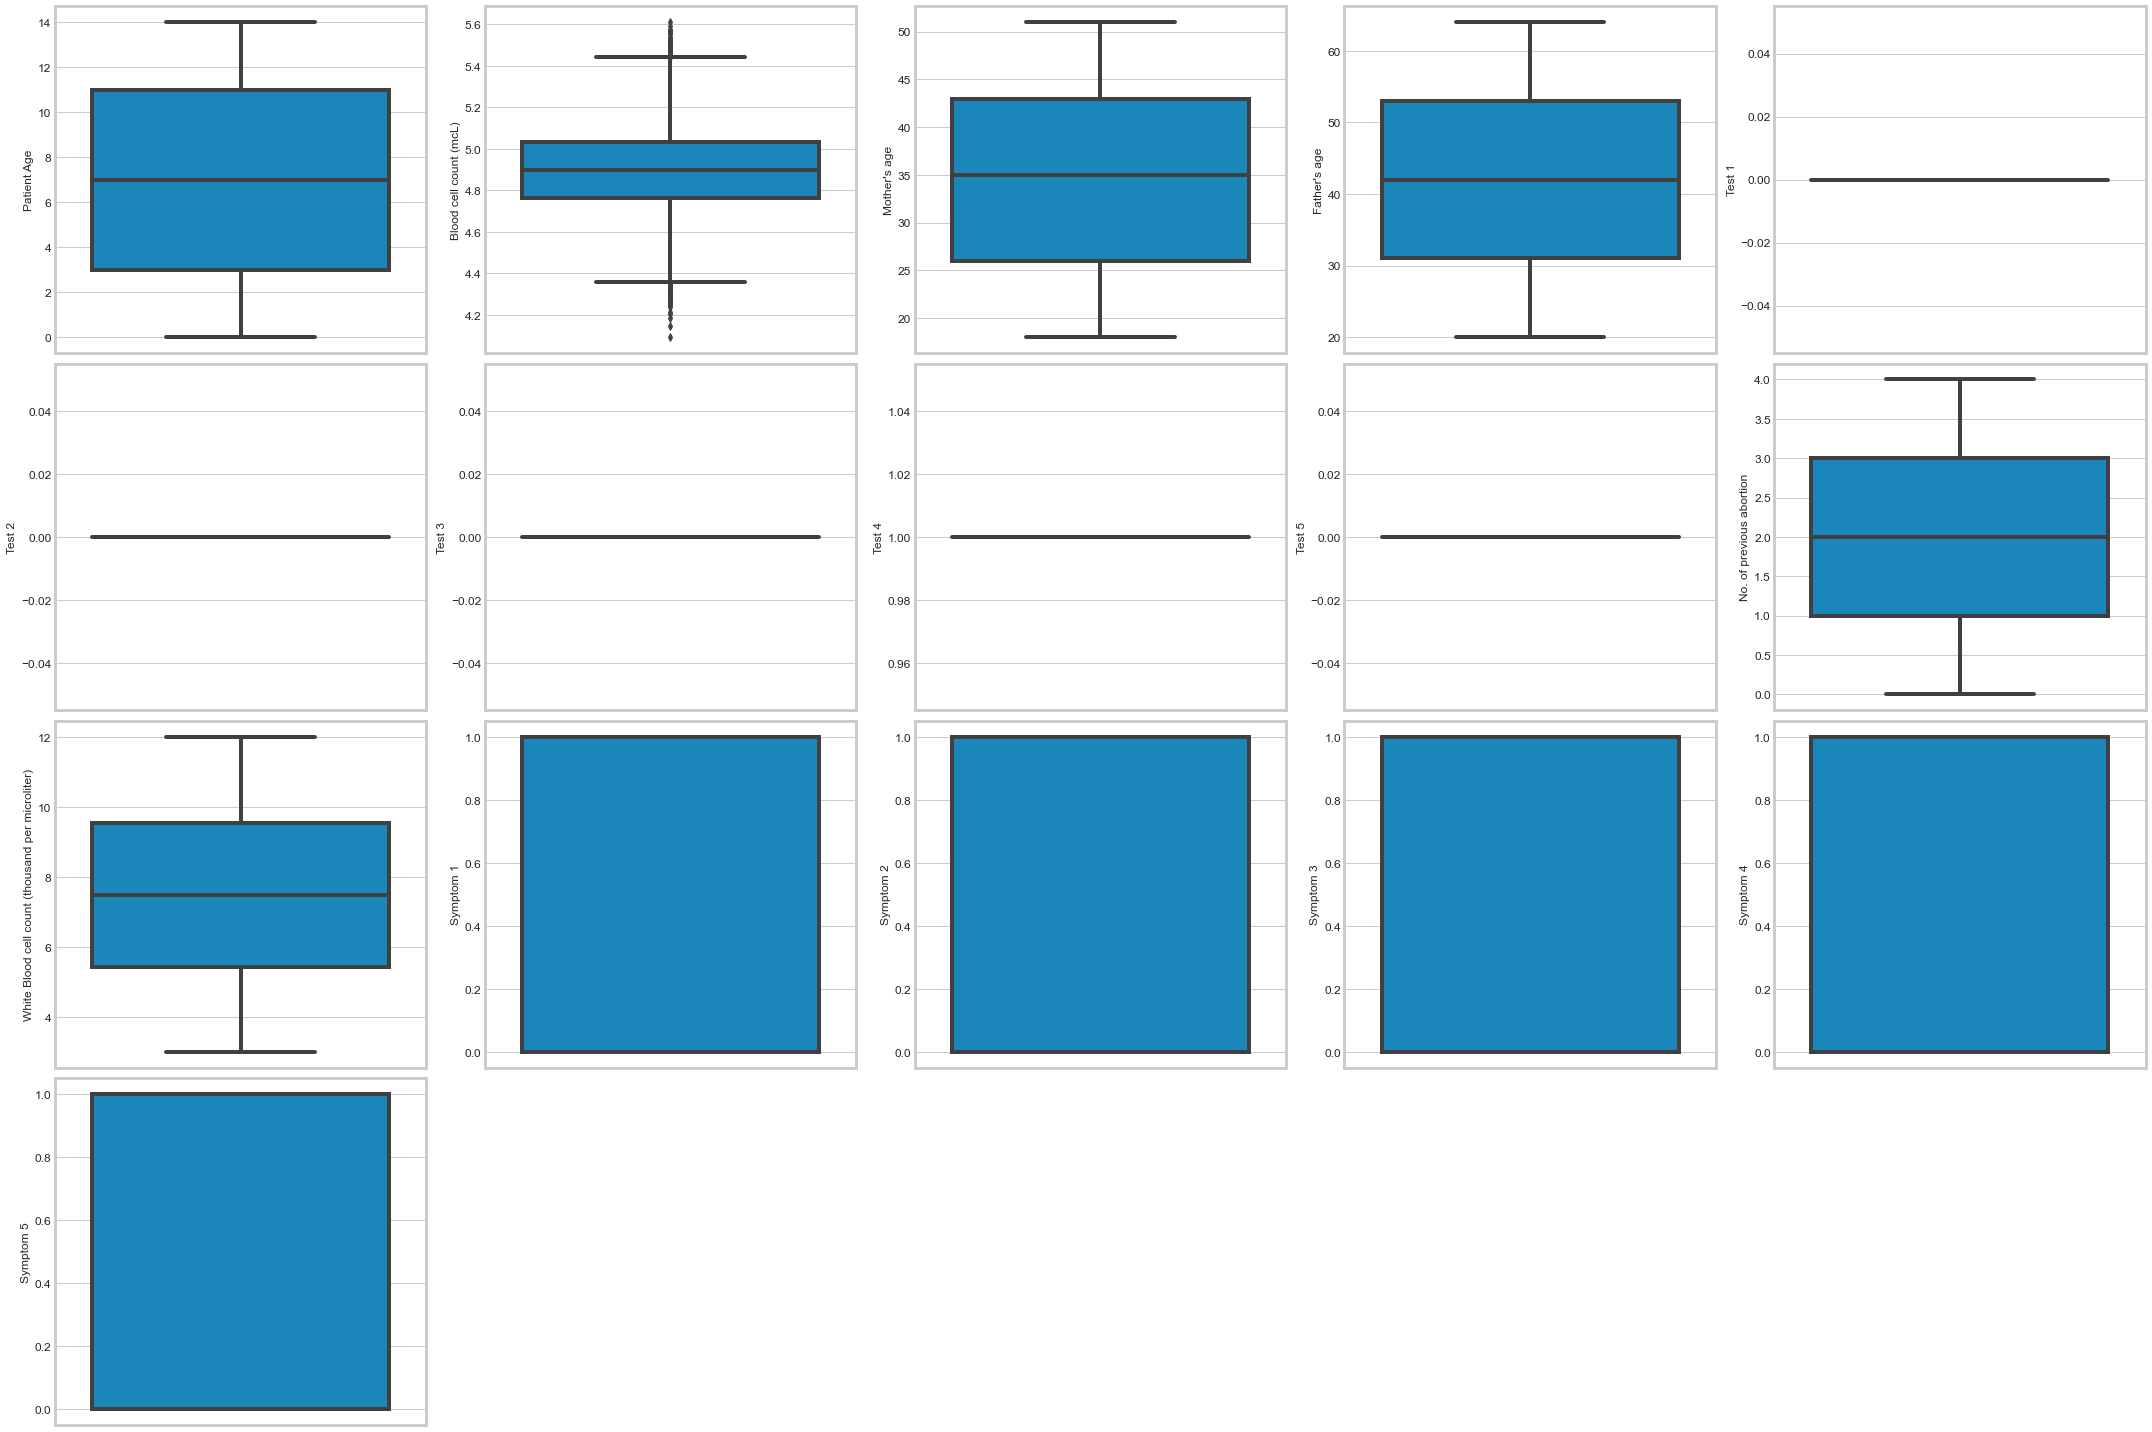

In [17]:
## Box plot of numerical features
fig = plt.figure(figsize=(30,20))
for i in range(len(num_features.columns)):
    fig.add_subplot(4,5,i+1)
    sns.boxplot(y = num_features.iloc[:,i])
plt.tight_layout()
plt.show()

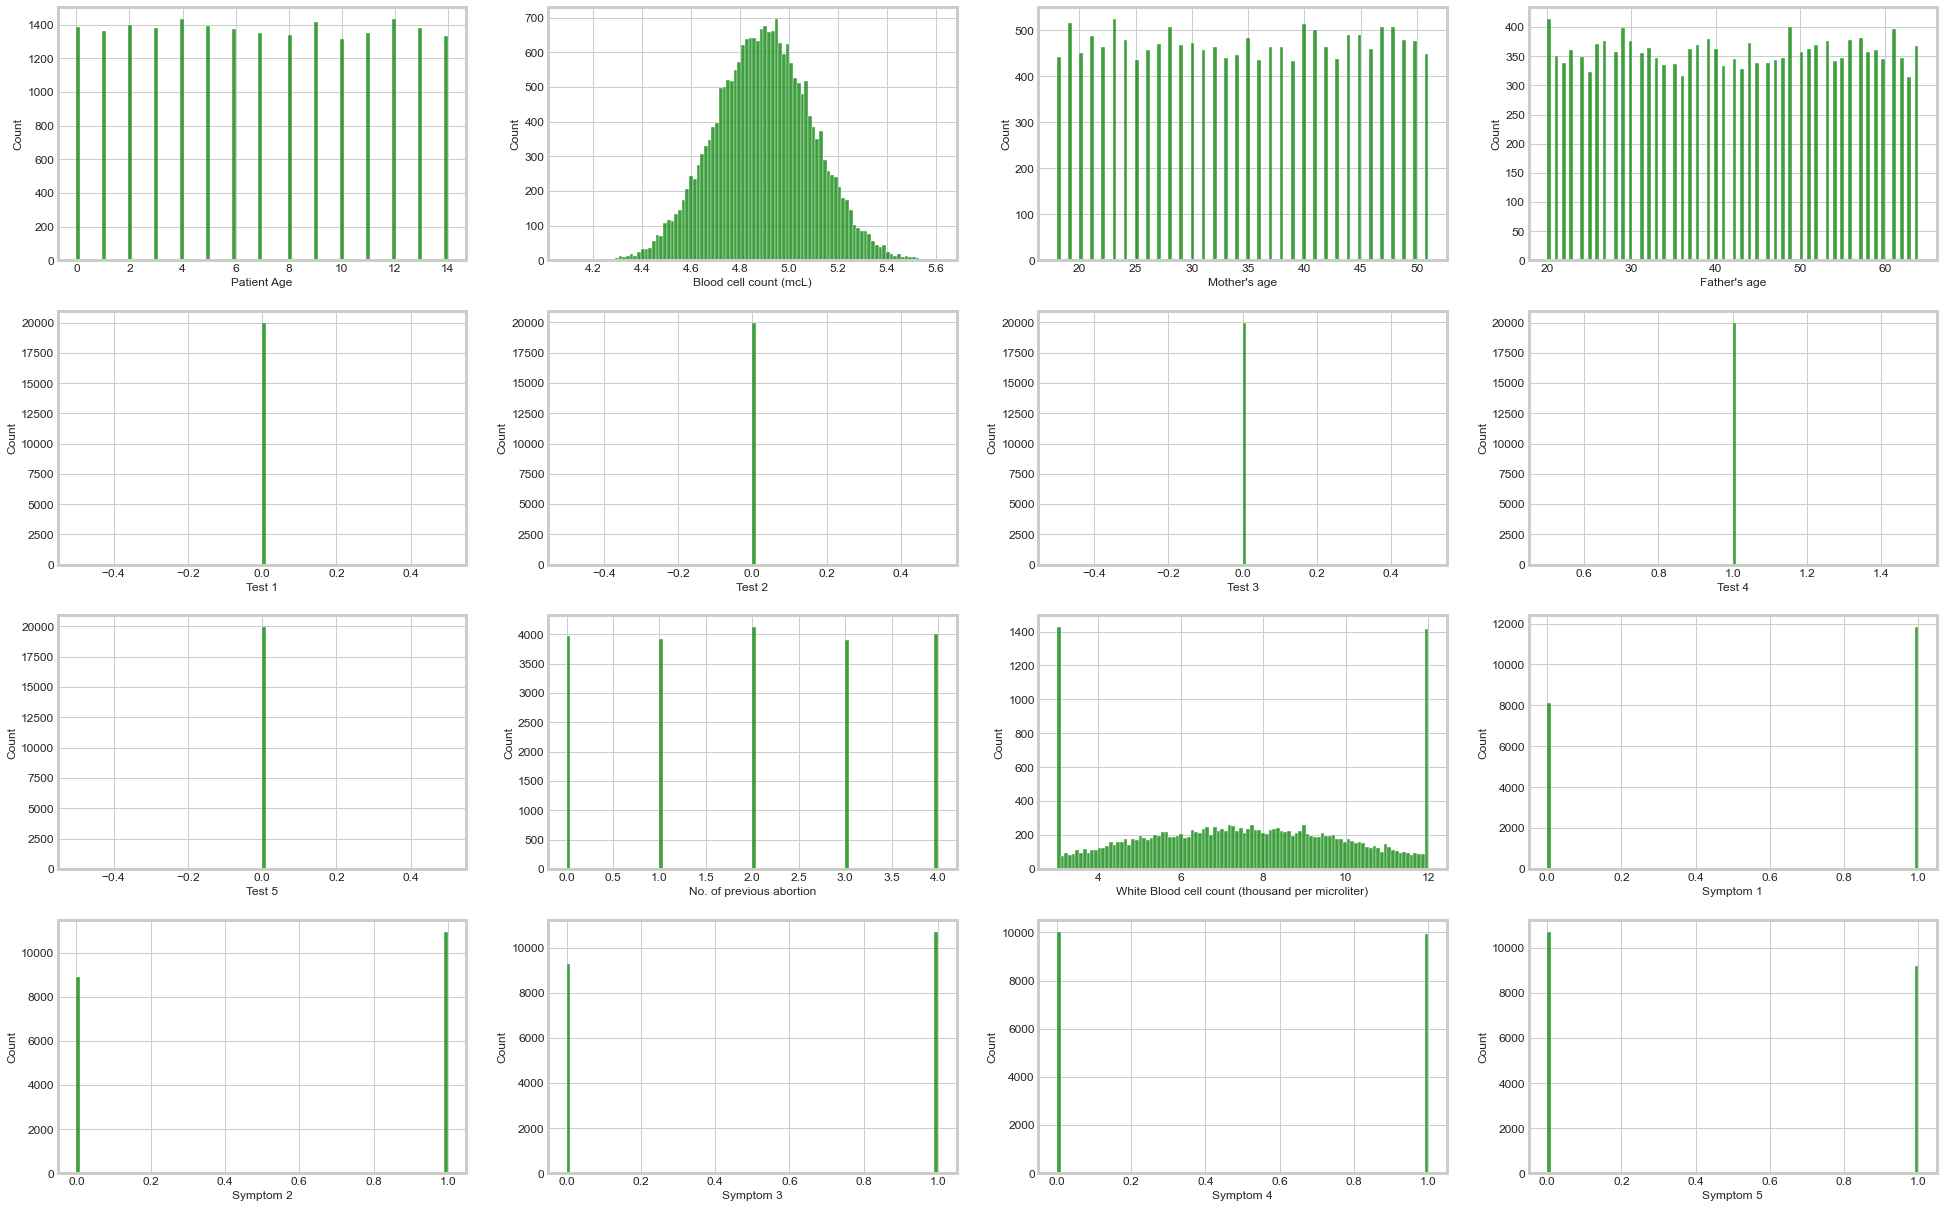

In [18]:
#plt.figure(figsize= (10,5))
figure2 = plt.figure(figsize= (30,20))

for i in range(len(num_features.columns)):
    figure2.add_subplot(4,4, i+1)
    sns.histplot(num_features.iloc[:,i], bins= 100, color= "green")
    
sns.set_style("darkgrid")
plt.show()

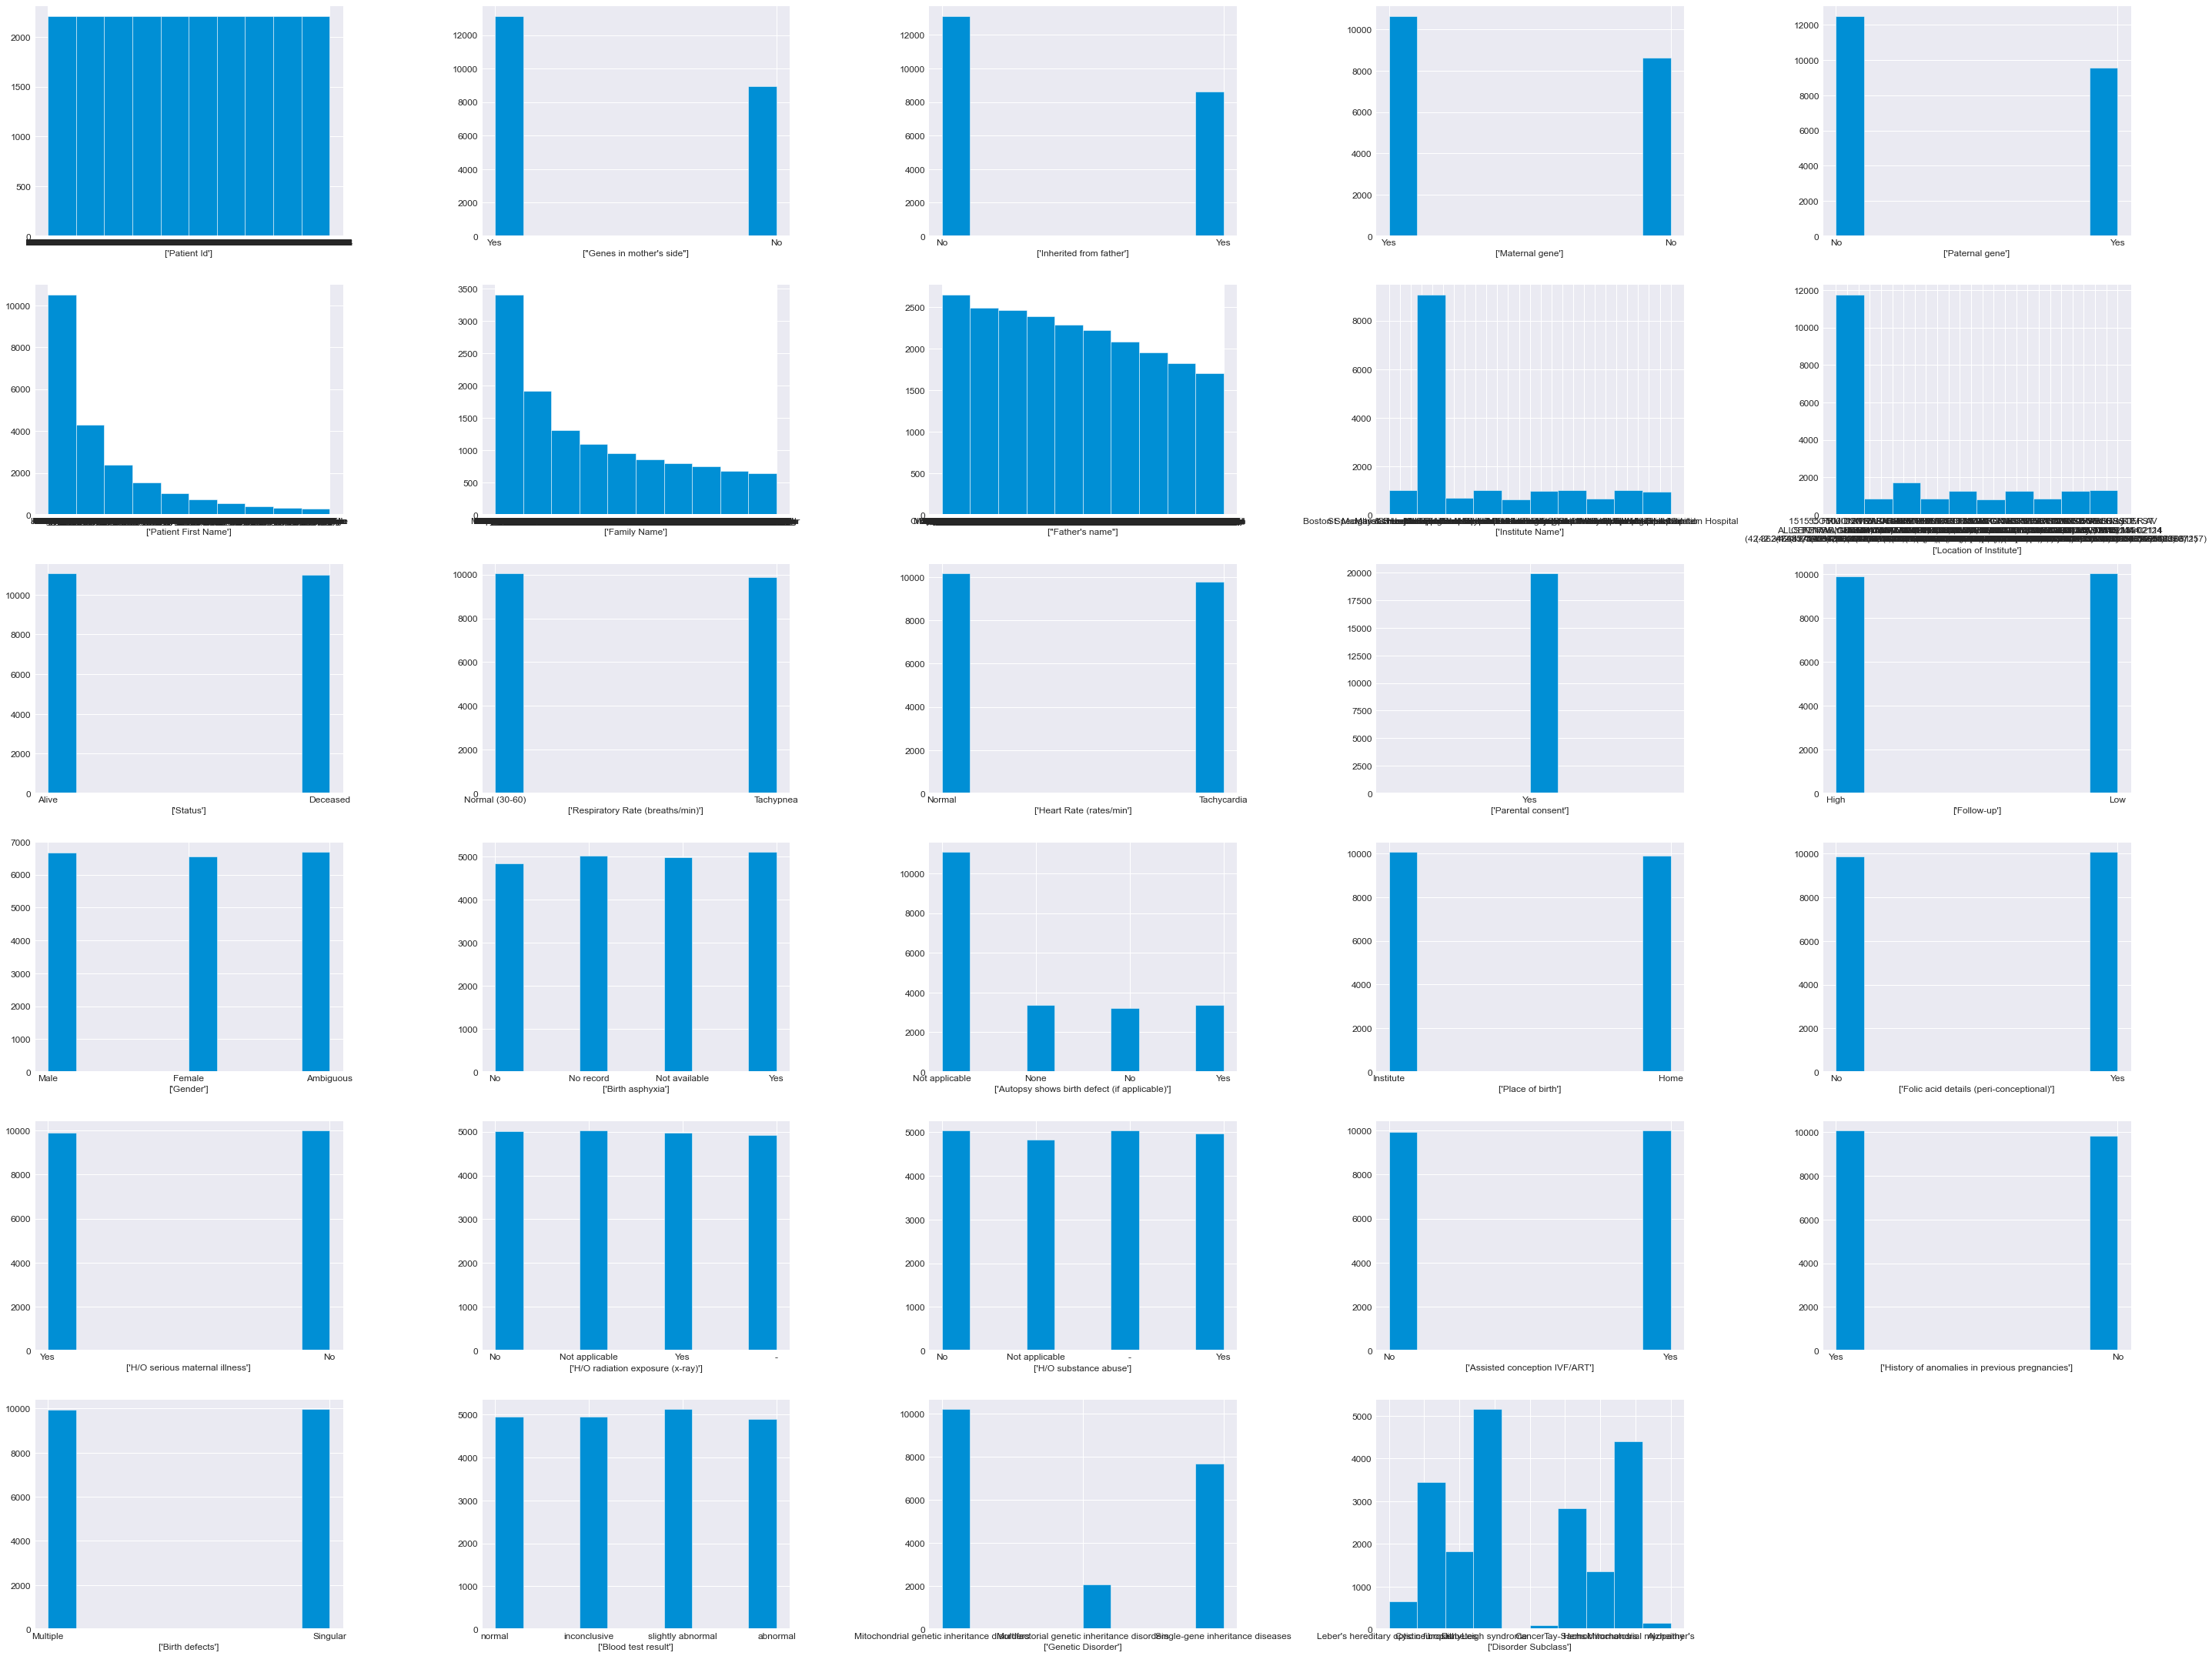

In [19]:
## Hist plot for categorical features in training set
figure2 = plt.figure(figsize=(40,30))
for i in range(len(cat_features.columns)):
    figure2.add_subplot(6,5,i+1)
    cat_features.iloc[:,i].hist()
    plt.xlabel([cat_features.columns[i]])
    
plt.tight_layout()
plt.show()

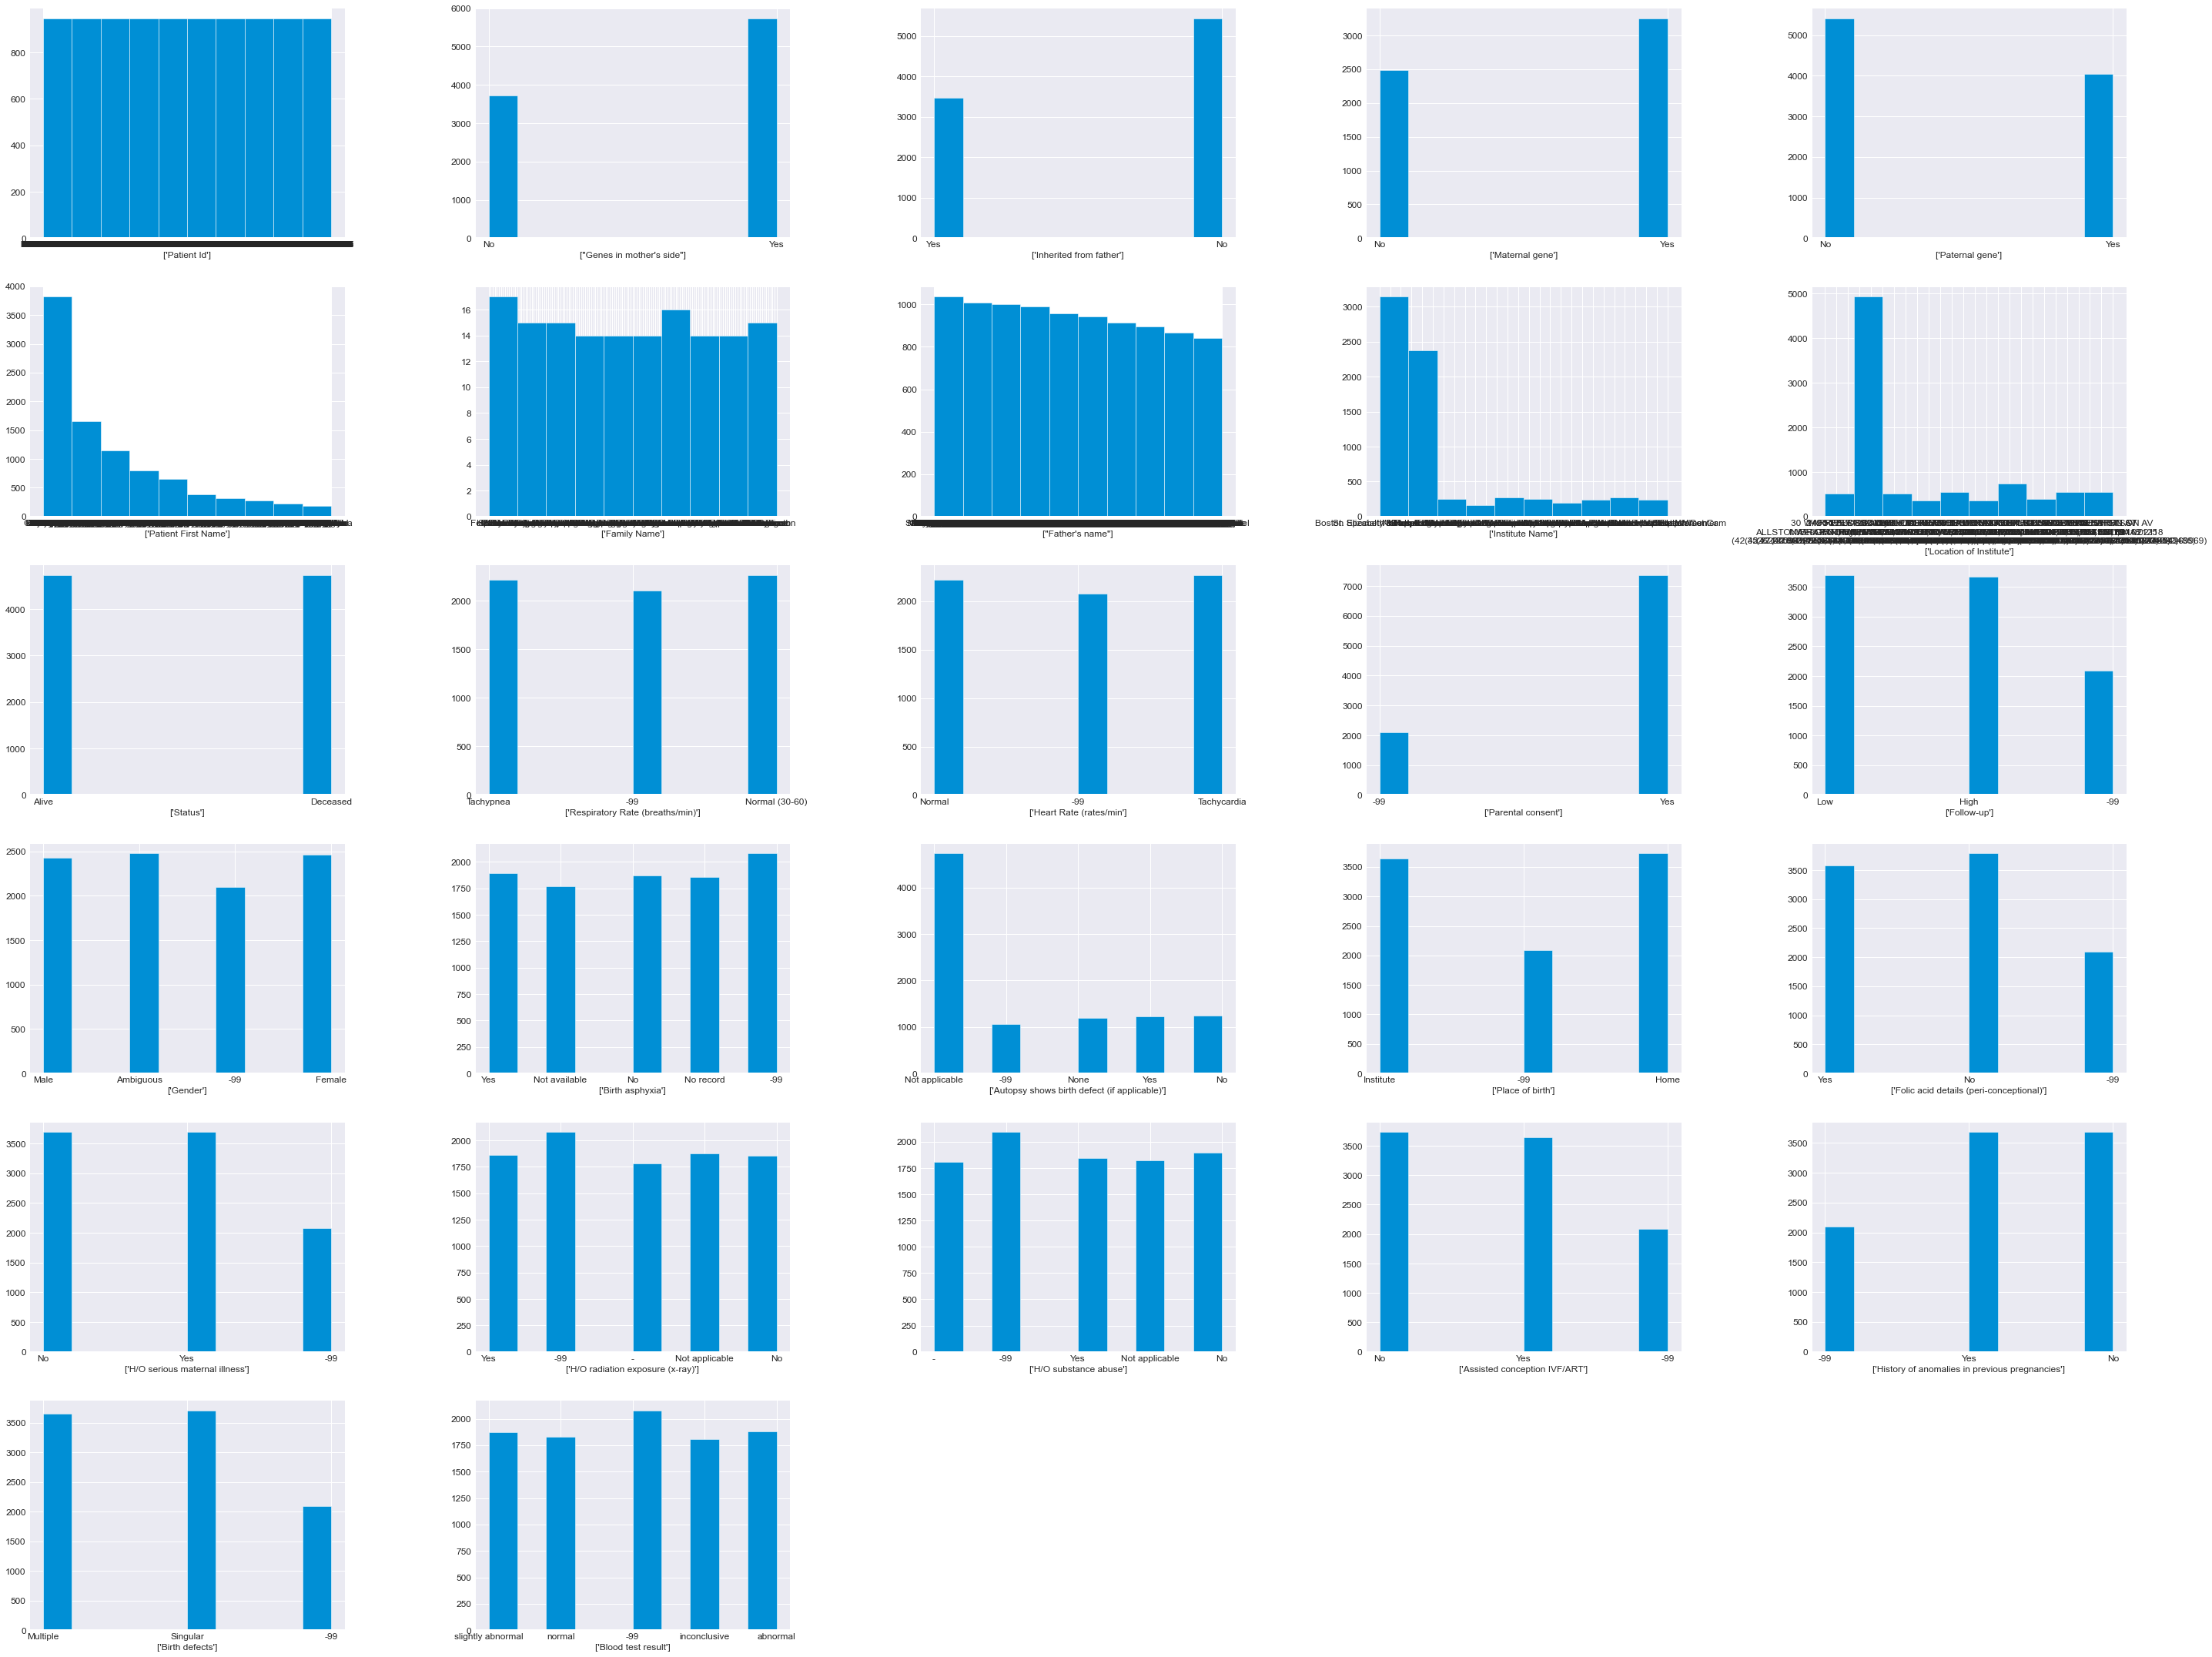

In [20]:
## Hist plot for categorical features in test set
figure3 = plt.figure(figsize=(40,30))
for i in range(len(cat_test_features.columns)):
    figure3.add_subplot(6,5,i+1)
    cat_test_features.iloc[:,i].hist()
    plt.xlabel([cat_test_features.columns[i]])
    
plt.tight_layout()
plt.show()

The idea is to check frequency distribution of a categorical feature

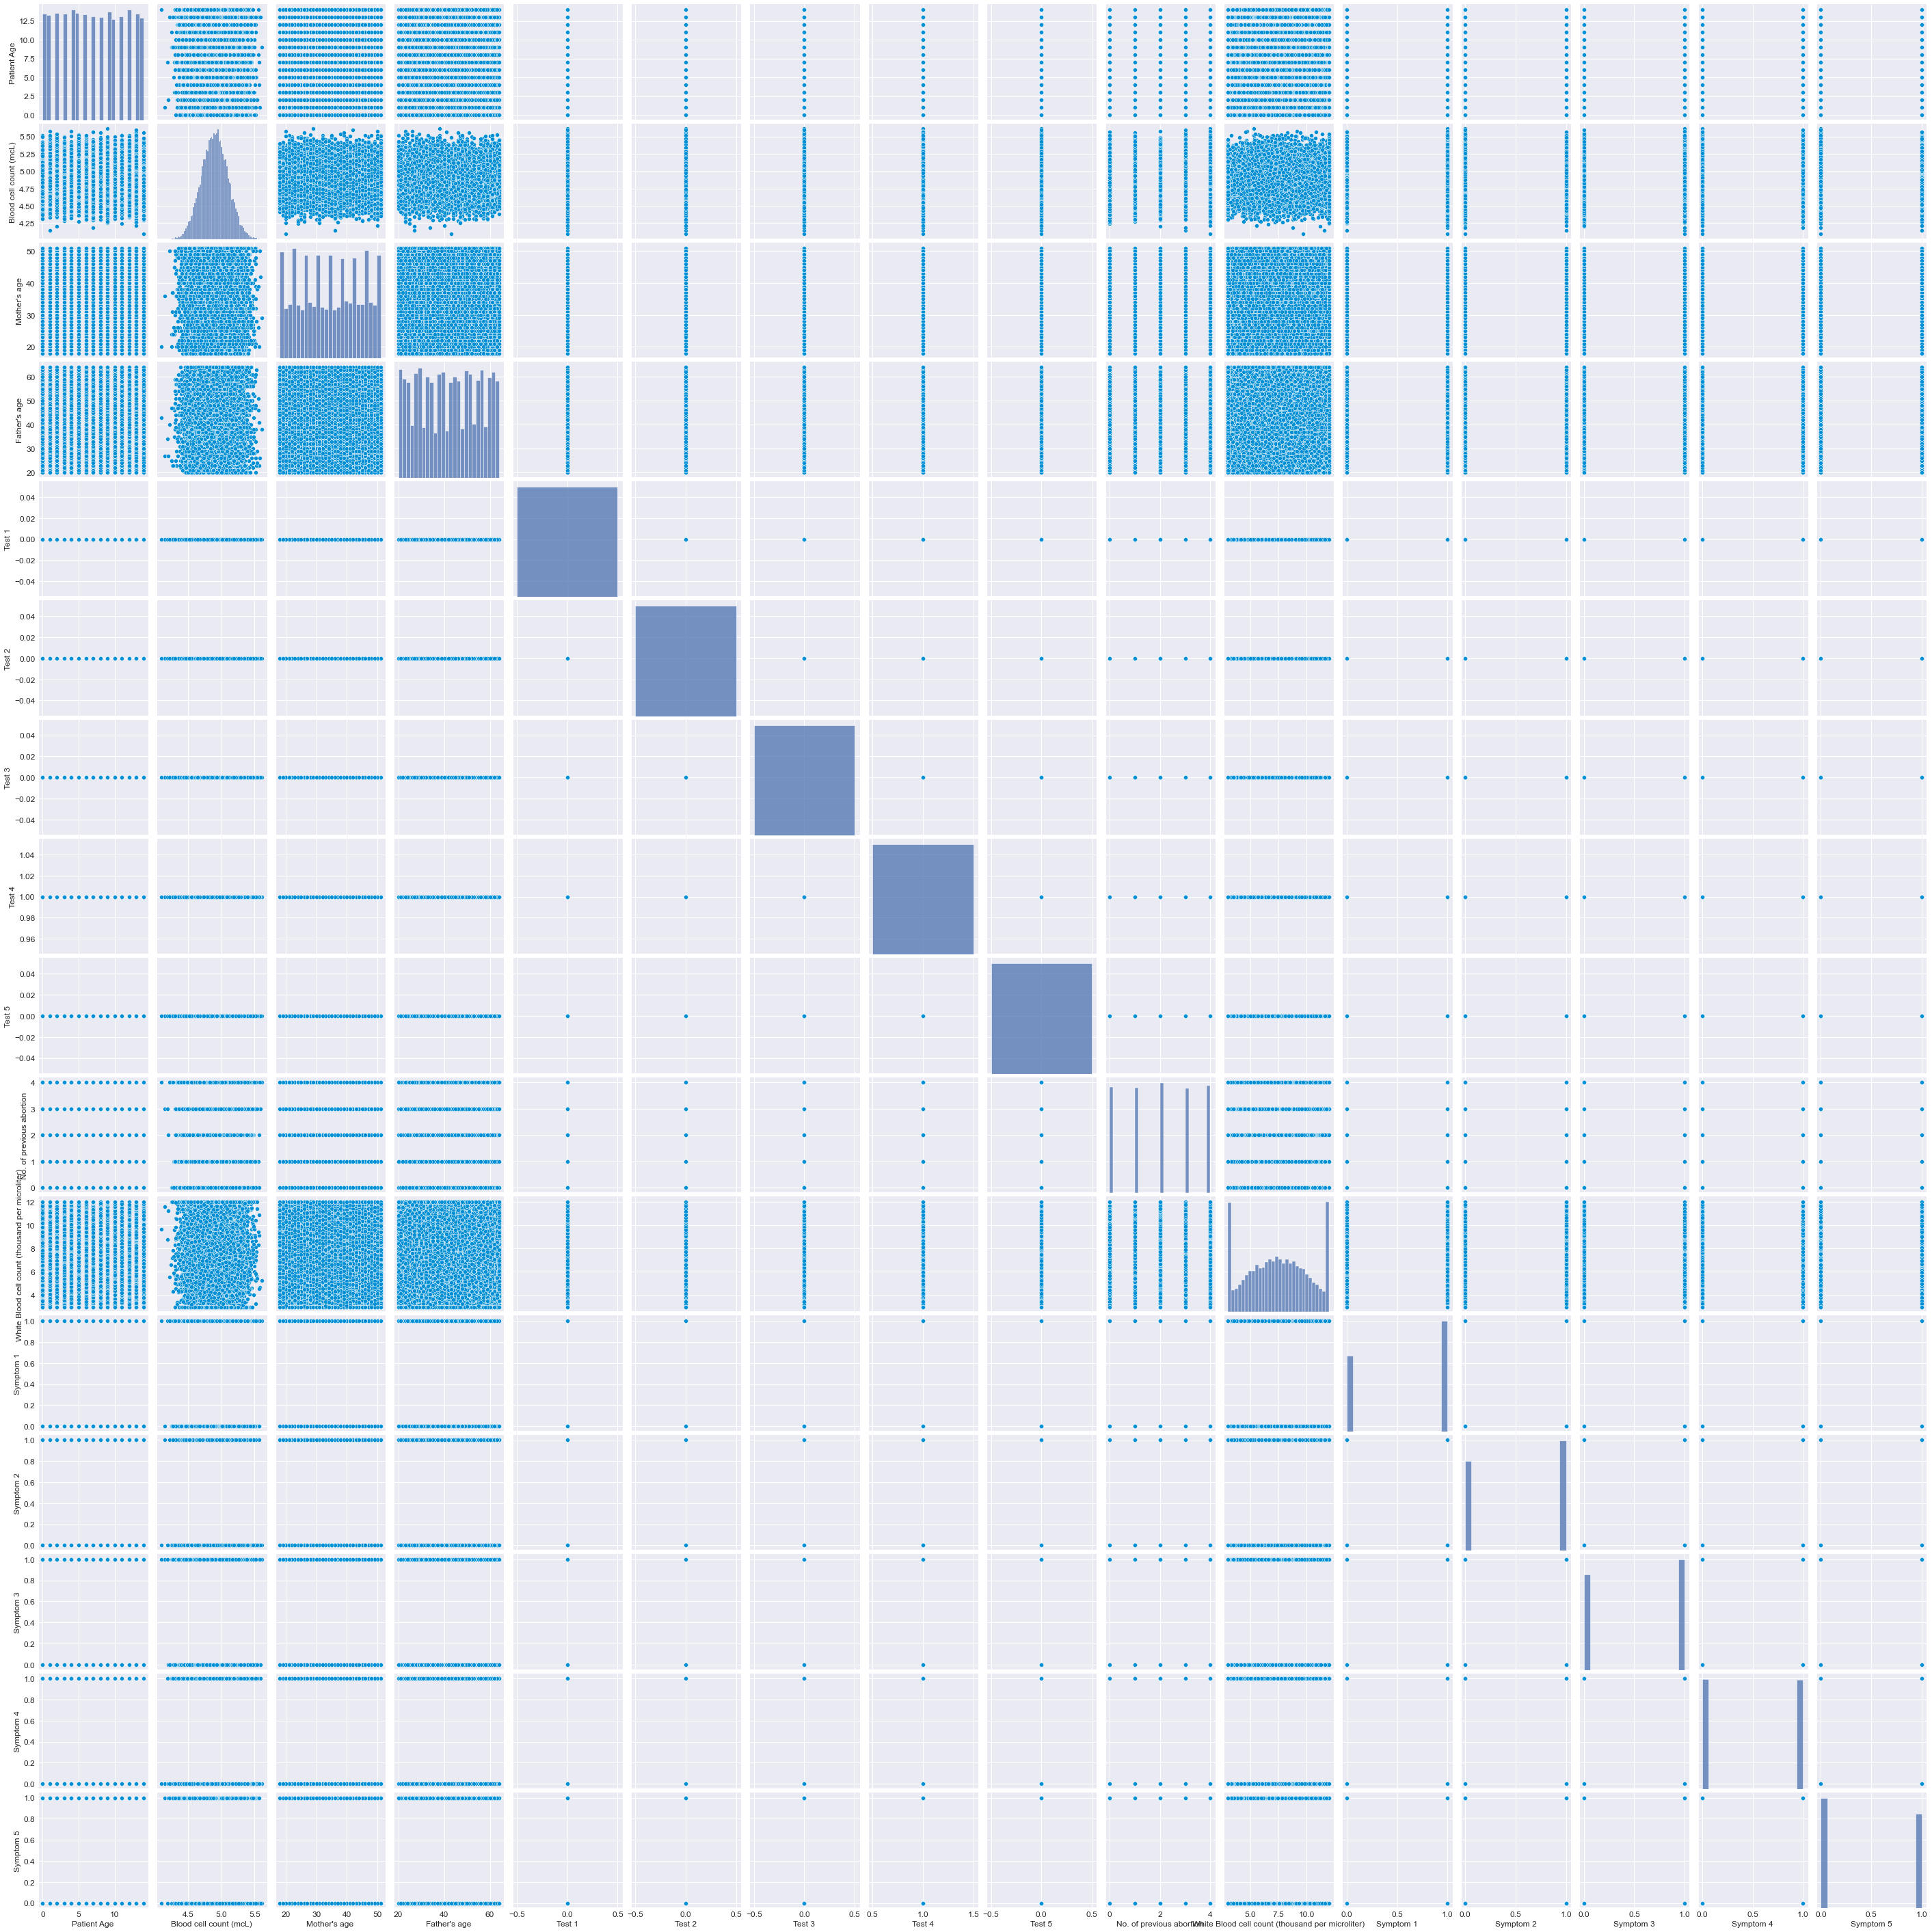

In [21]:
sns.pairplot(df)
plt.show()

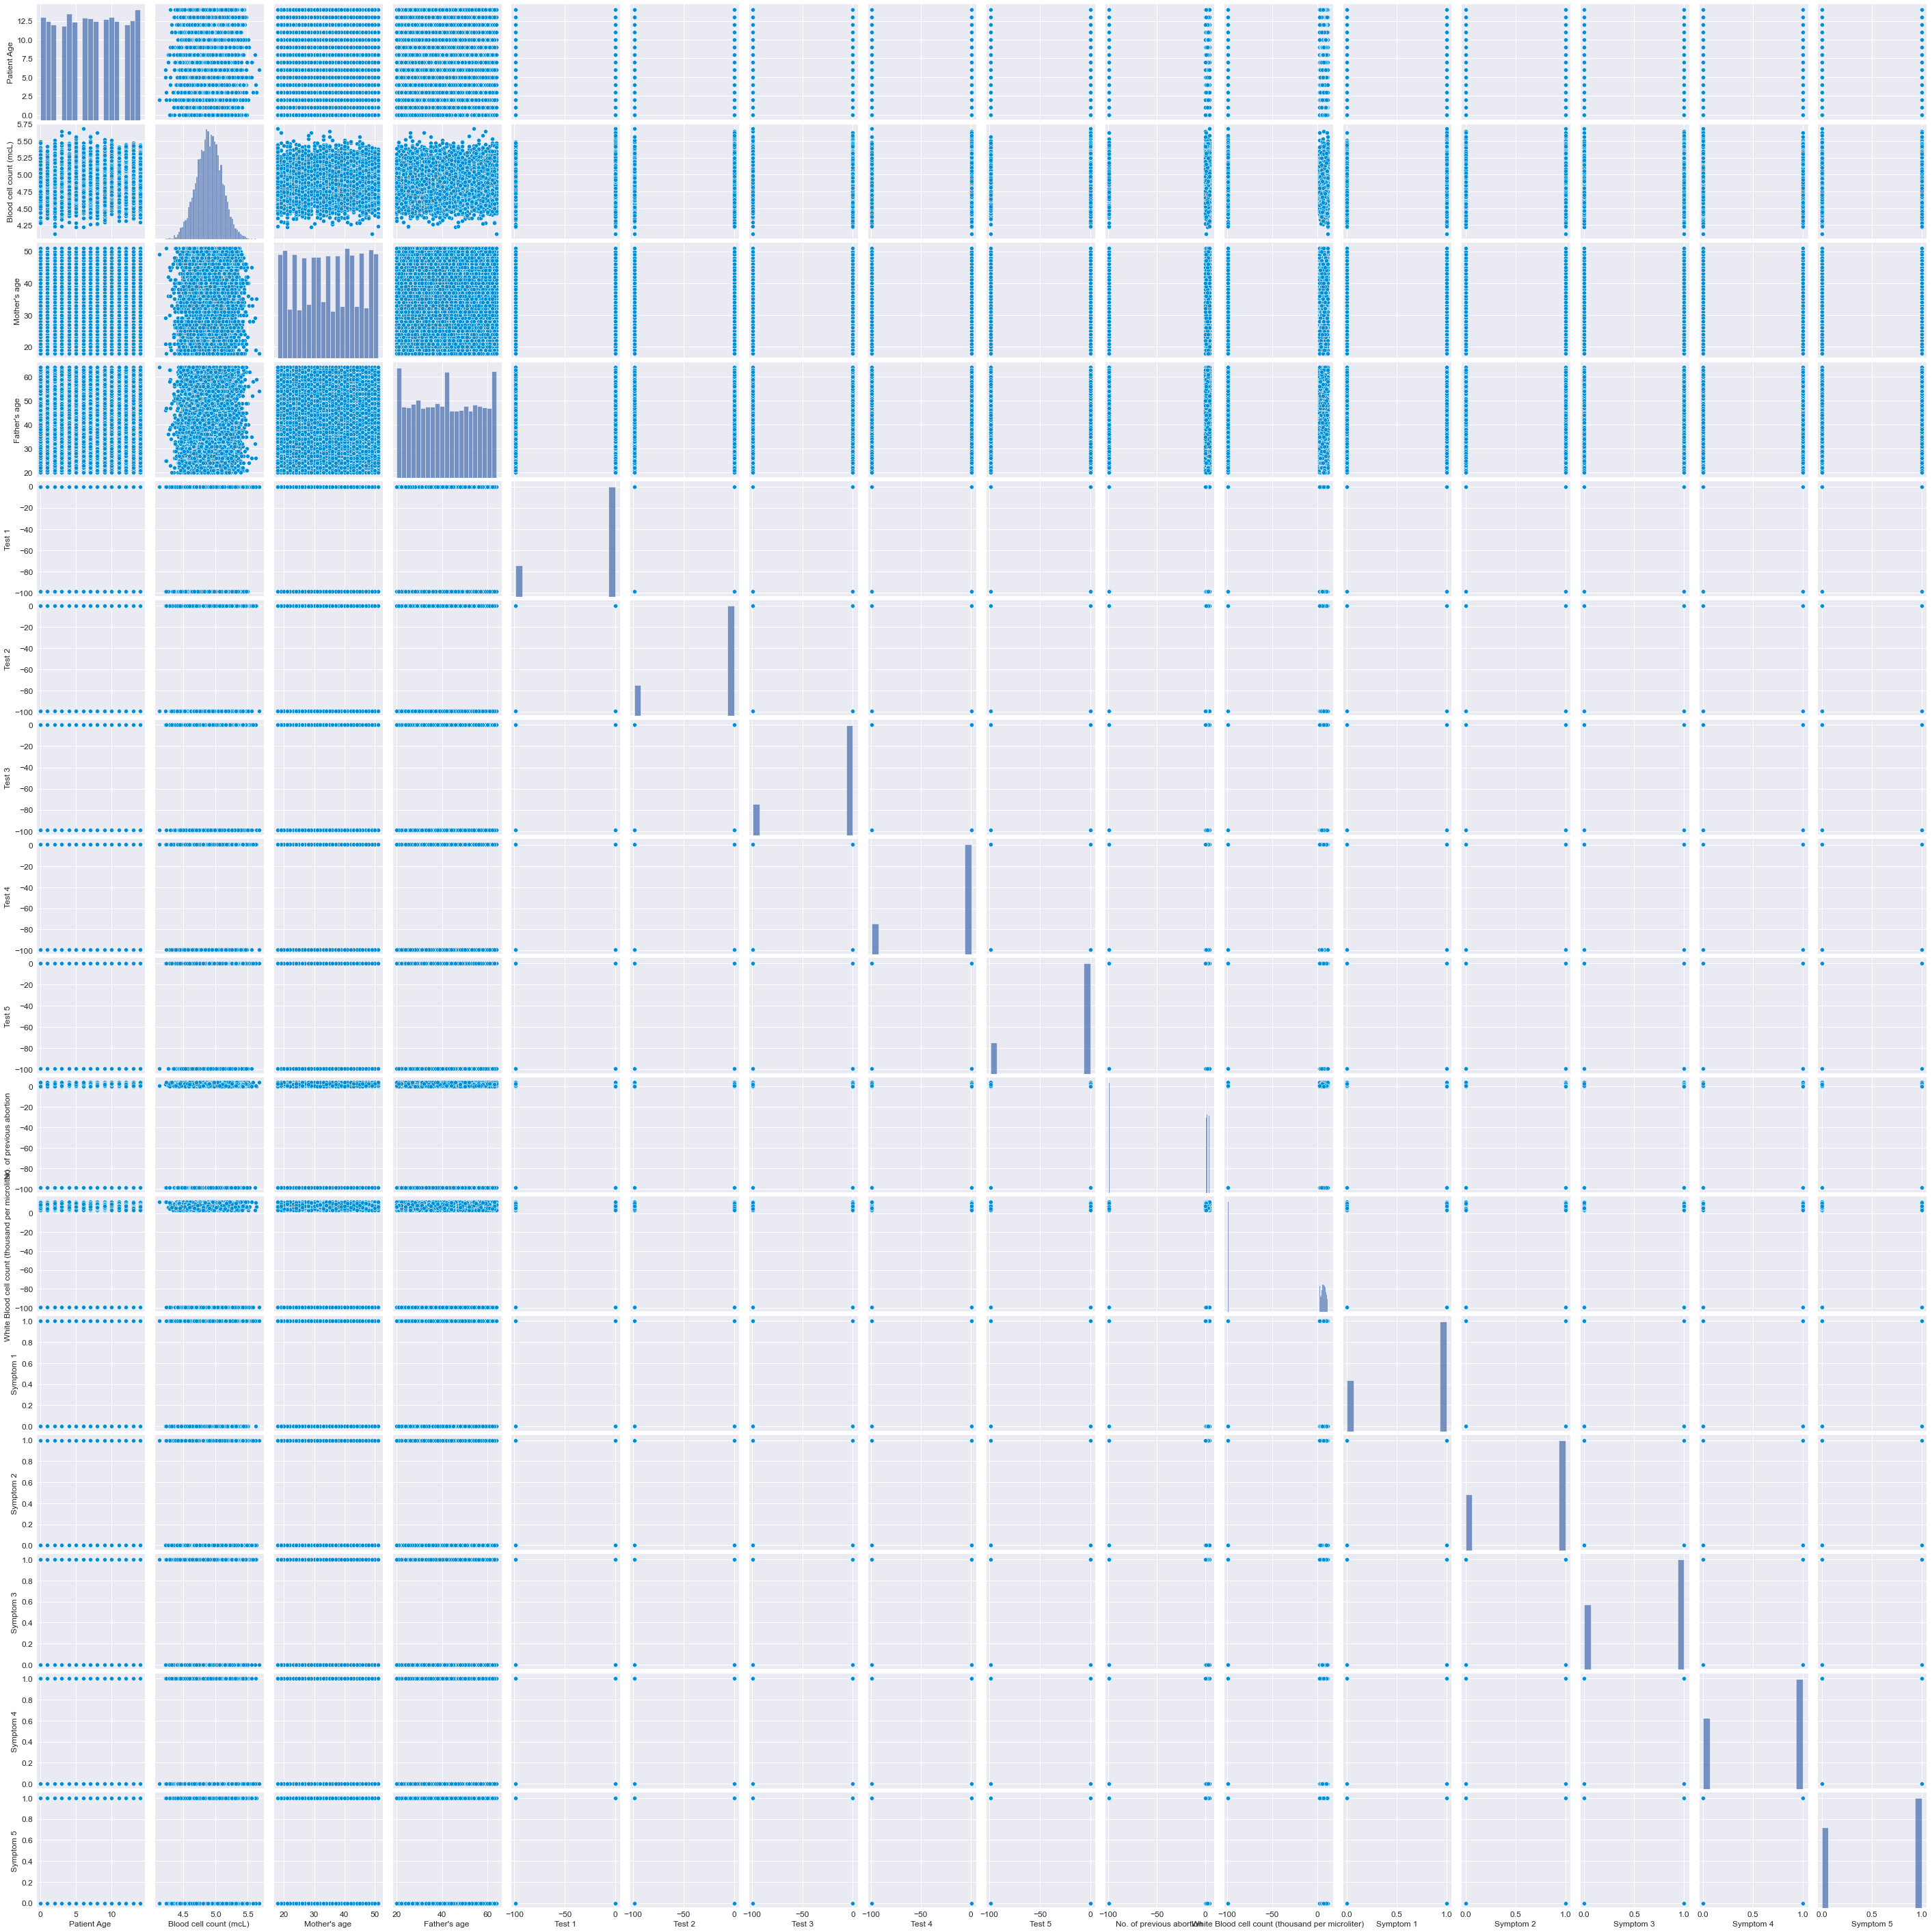

In [22]:
sns.pairplot(df_test)
plt.show()

In [23]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side', 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)', 'Patient First Name', 'Family Name', 'Father's name', 'Mother's age', 'Father's age', 'Institute Name', 'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
       'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [24]:
skew_features = num_features.apply(lambda x :x.skew()).sort_values(ascending=True)
skew_features

Symptom 1                                          -0.38
Symptom 2                                          -0.21
Symptom 3                                          -0.15
Father's age                                       -0.01
Mother's age                                       -0.01
No. of previous abortion                           -0.00
Test 1                                              0.00
Test 2                                              0.00
Test 3                                              0.00
Test 4                                              0.00
Test 5                                              0.00
White Blood cell count (thousand per microliter)    0.01
Symptom 4                                           0.01
Patient Age                                         0.01
Blood cell count (mcL)                              0.01
Symptom 5                                           0.15
dtype: float64

# #######################

## Now let us begin with analysing each and every feature

In [25]:
def comparing_train_and_test_feature(df,df_test,col):
    fig = plt.figure(figsize=(16,10))
    ax0 = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    df[col].plot(kind='kde',ax=ax0)
    df_test[col].plot(kind='kde',ax=ax1)
    ax0.set_xlabel(col)
    ax1.set_xlabel(col)
    ax0.set_title("Density plot of " + str(col) + " of training set")
    ax1.set_title("Density plot of " + str(col) + " of testing set")
    plt.show()

#### Num01: Patient Age

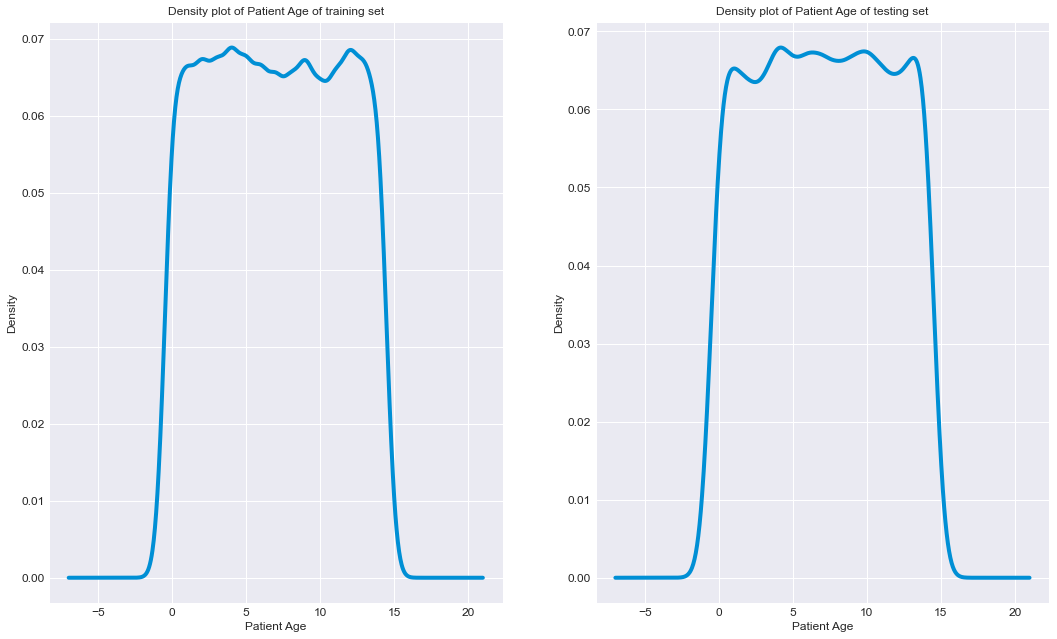

In [26]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df,df_test,'Patient Age')
## Distribution of Feature Patient Age of training and testing dataset are very similar

From the above plot of feature "Patient Age", we found that the distribution of "Patient Age" is almost same in training and testing dataset, so we are not changing anything in it.

<AxesSubplot:ylabel='Patient Age'>

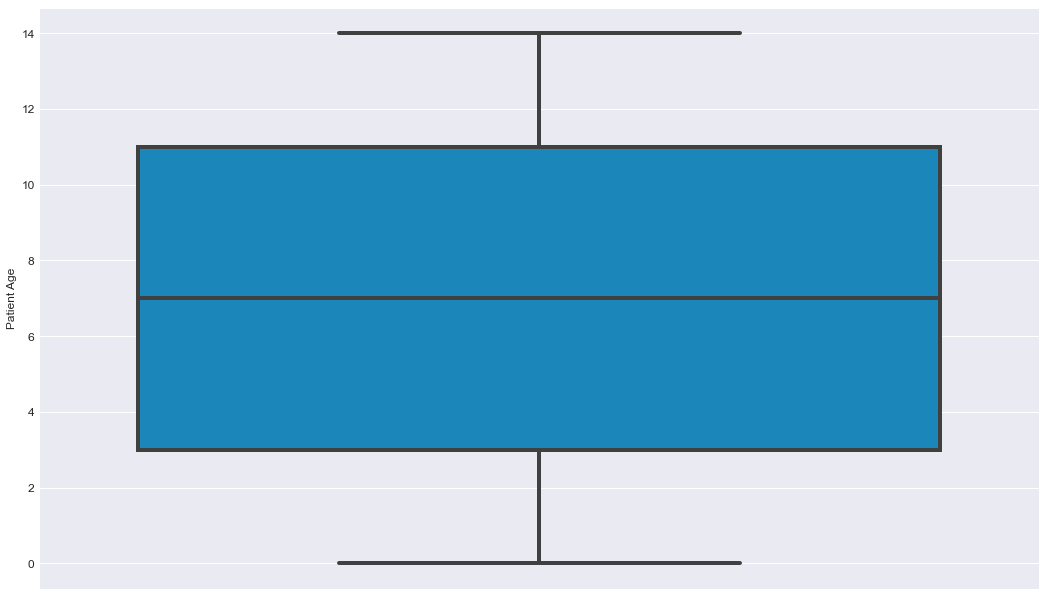

In [27]:
sns.boxplot(y='Patient Age',data=df)

<AxesSubplot:xlabel='Genetic Disorder', ylabel='Patient Age'>

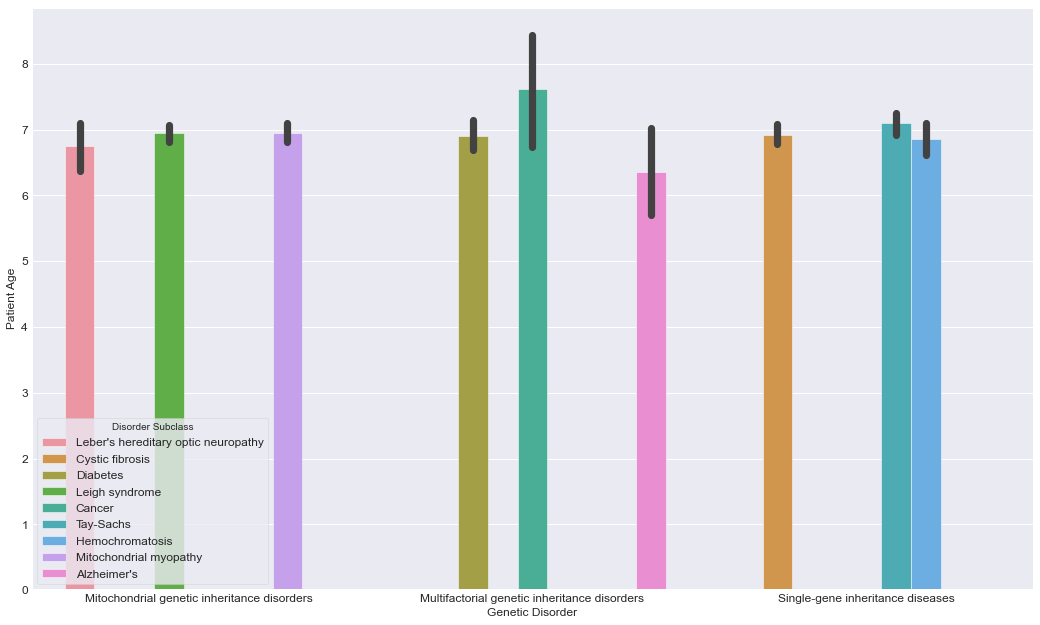

In [28]:
sns.barplot(x='Genetic Disorder',y='Patient Age',hue='Disorder Subclass',data=df )

#### Num02: Blood cell count (mcL)

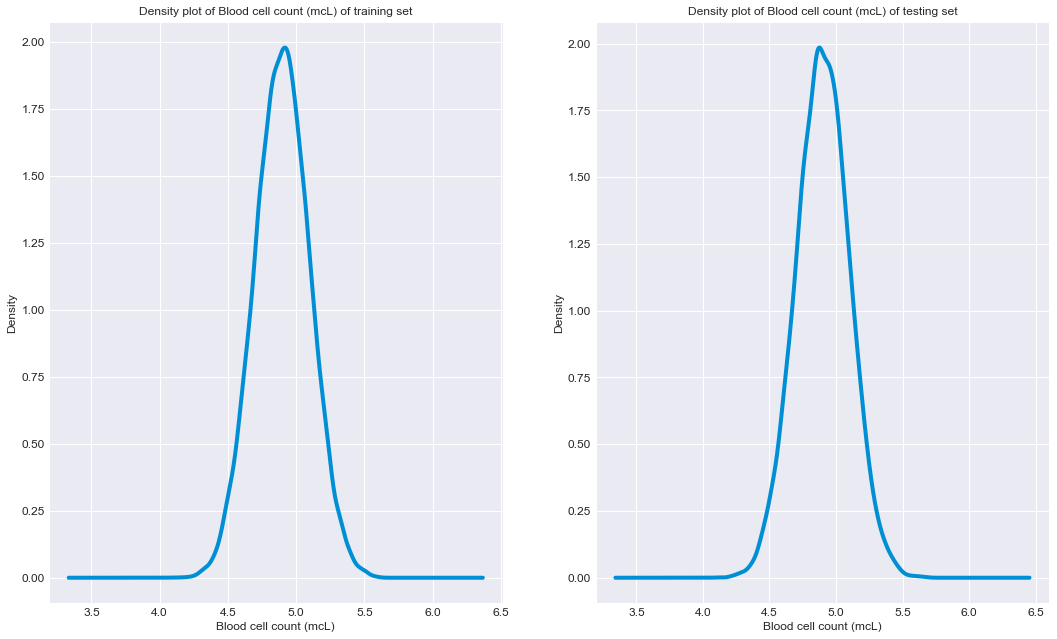

In [29]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df,df_test,'Blood cell count (mcL)')
## Distribution of Feature "Blood cell count (mcL))" of training and testing dataset is very similar

<AxesSubplot:ylabel='Blood cell count (mcL)'>

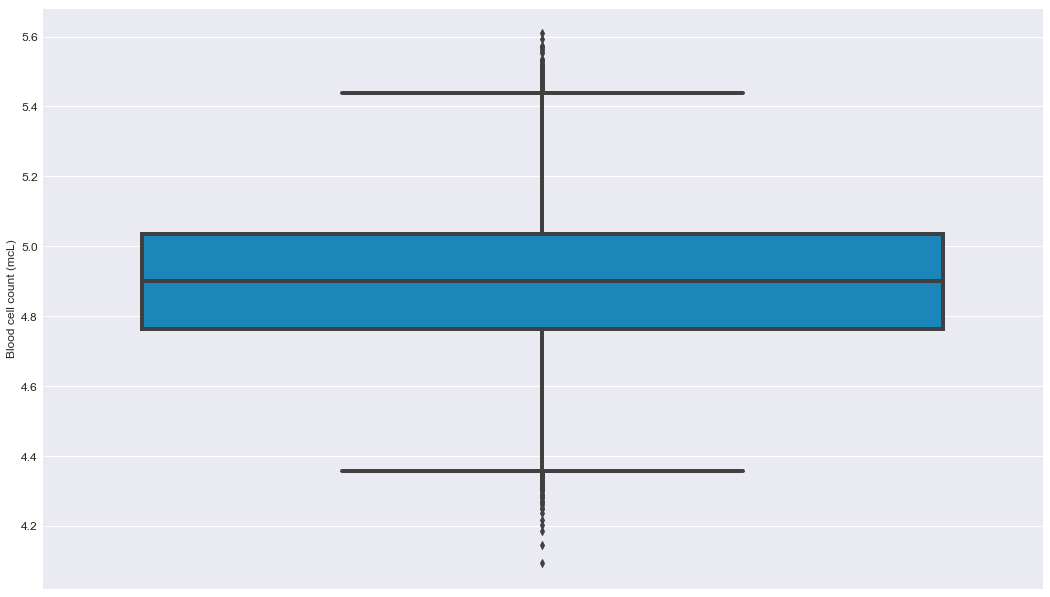

In [30]:
sns.boxplot(y='Blood cell count (mcL)',data=df)

<AxesSubplot:xlabel='Genetic Disorder', ylabel='Blood cell count (mcL)'>

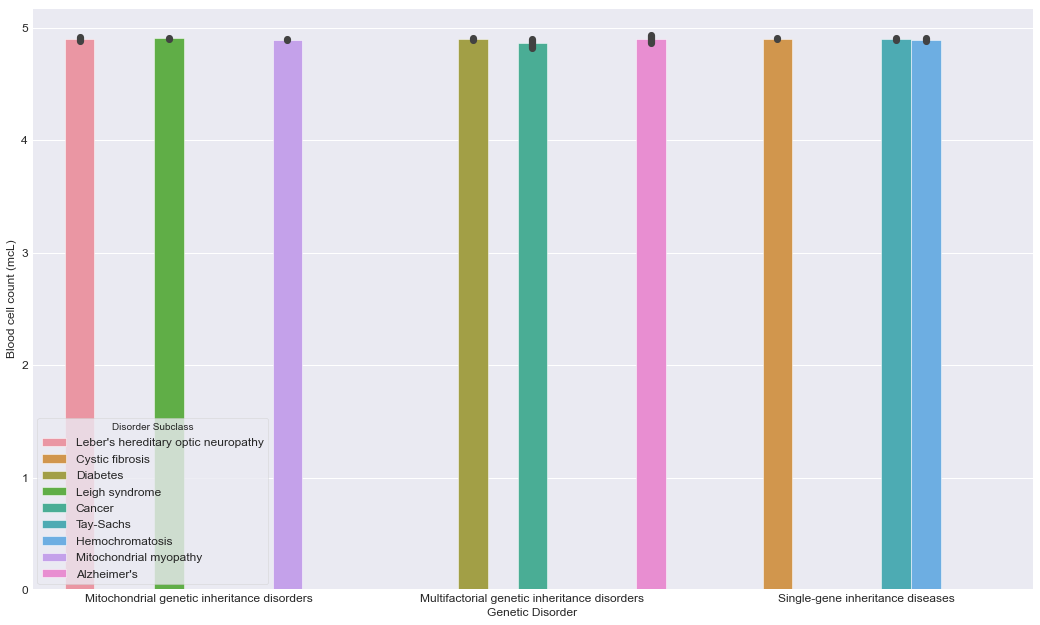

In [31]:
sns.barplot(x='Genetic Disorder',y='Blood cell count (mcL)',hue='Disorder Subclass',data=df )

In [32]:
df["Blood cell count (mcL)"].value_counts()

4.77    1
4.67    1
4.54    1
4.61    1
4.98    1
       ..
4.98    1
4.96    1
5.00    1
4.49    1
4.57    1
Name: Blood cell count (mcL), Length: 22083, dtype: int64

#### Num03: Mother's age

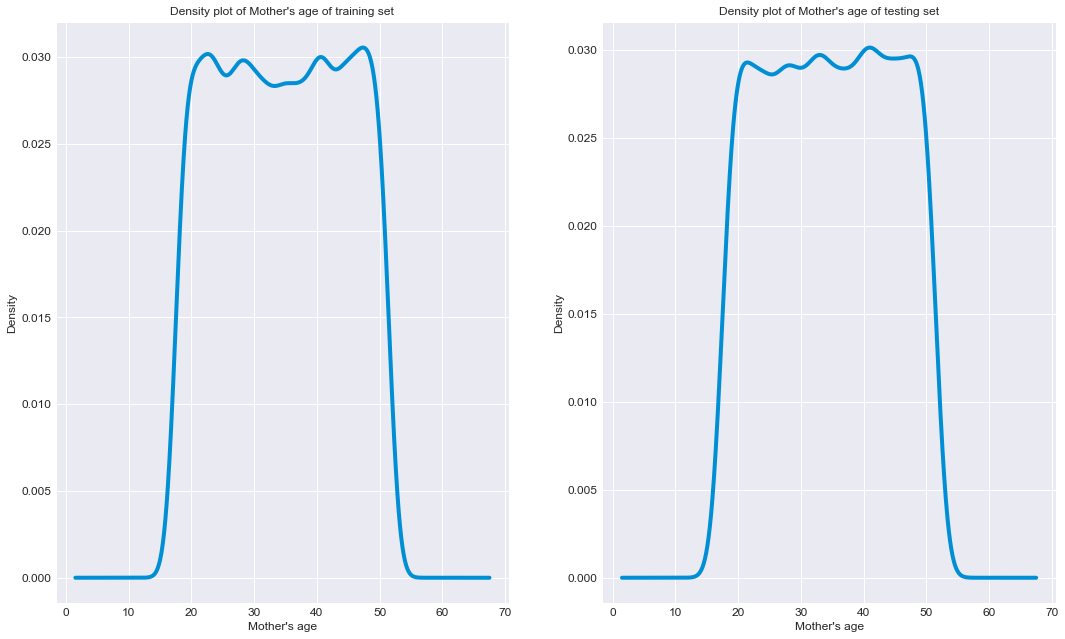

In [33]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df,df_test,"Mother's age")
## Distribution of Feature "Blood cell count (mcL))" of training and testing dataset is very similar

<AxesSubplot:ylabel="Mother's age">

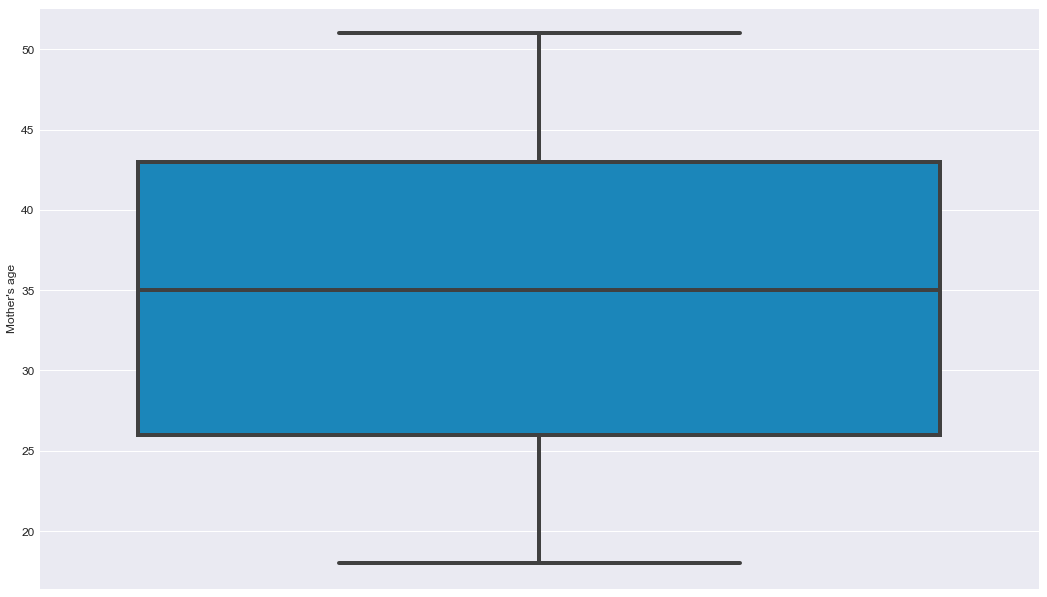

In [34]:
sns.boxplot(y="Mother's age",data=df)

<AxesSubplot:xlabel='Genetic Disorder', ylabel="Mother's age">

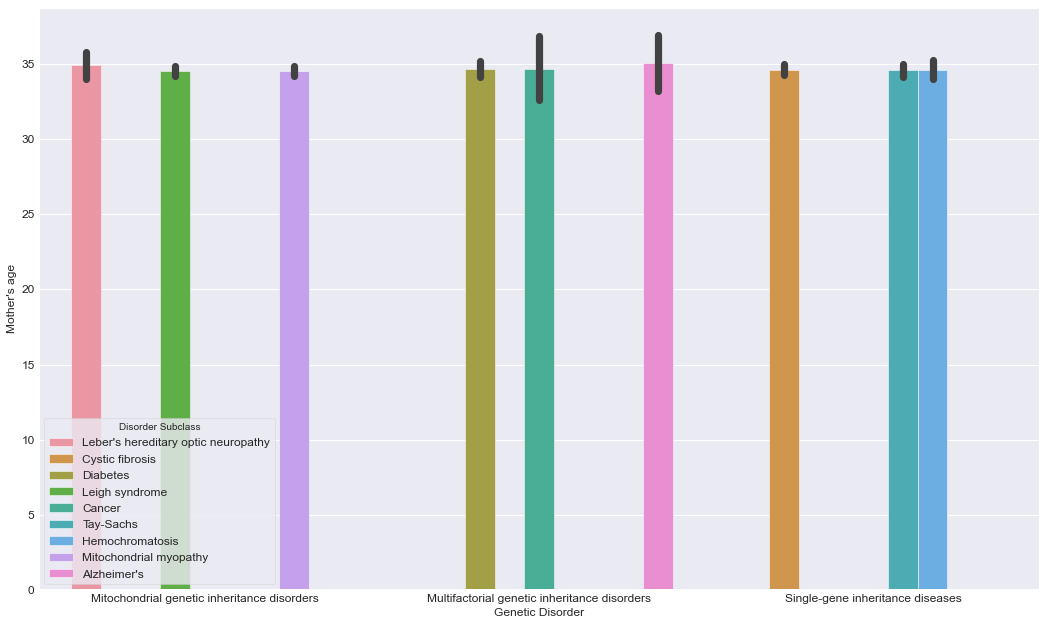

In [35]:
sns.barplot(x='Genetic Disorder',y="Mother's age",hue='Disorder Subclass',data=df )

In [36]:
df["Mother\'s age"].value_counts()

23.00    525
19.00    516
40.00    515
28.00    508
47.00    508
48.00    507
41.00    502
45.00    490
44.00    489
21.00    488
35.00    484
24.00    480
49.00    479
50.00    476
30.00    473
27.00    471
29.00    469
32.00    465
38.00    465
42.00    464
22.00    463
37.00    463
46.00    460
26.00    457
31.00    457
20.00    451
51.00    449
34.00    447
18.00    443
33.00    441
43.00    437
36.00    436
25.00    435
39.00    434
Name: Mother's age, dtype: int64

#### Num04: Father's age

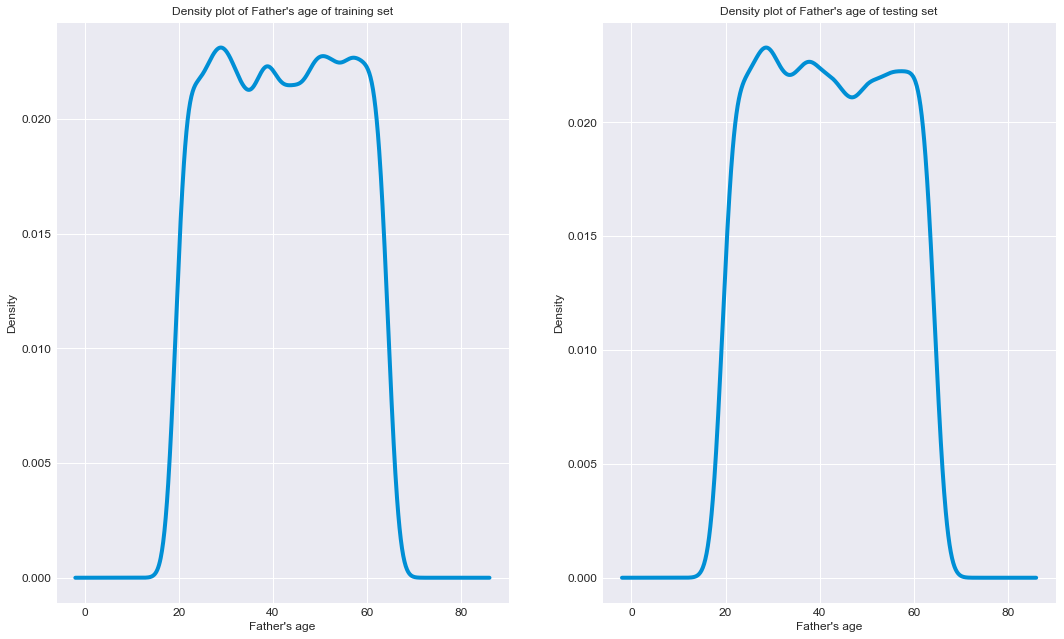

In [37]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df,df_test,"Father's age")
## Distribution of Feature "Blood cell count (mcL))" of training and testing dataset is very similar

<AxesSubplot:ylabel="Father's age">

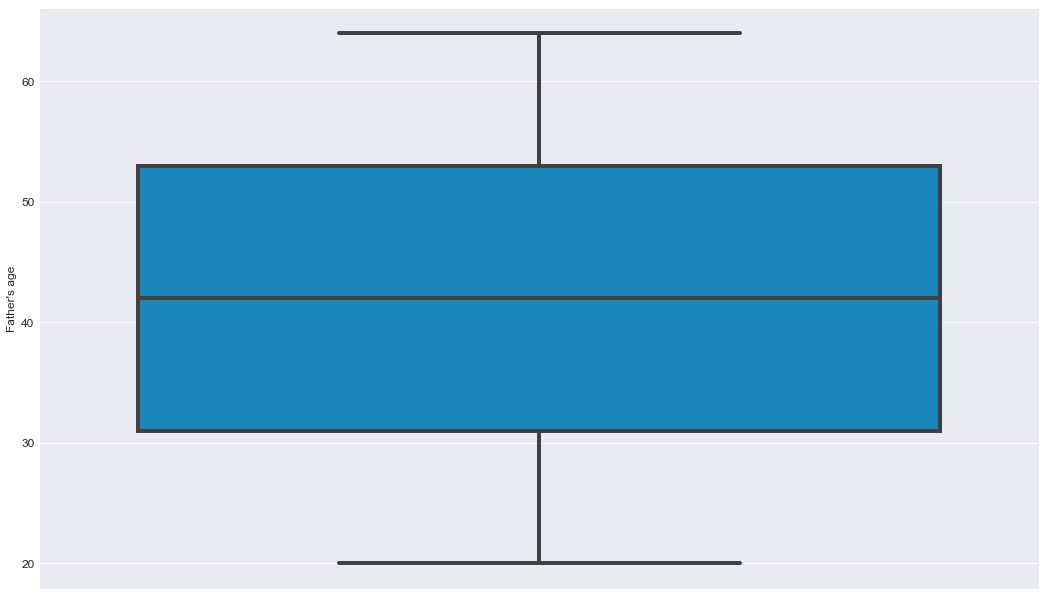

In [38]:
sns.boxplot(y="Father's age",data=df)

<AxesSubplot:xlabel='Genetic Disorder', ylabel="Father's age">

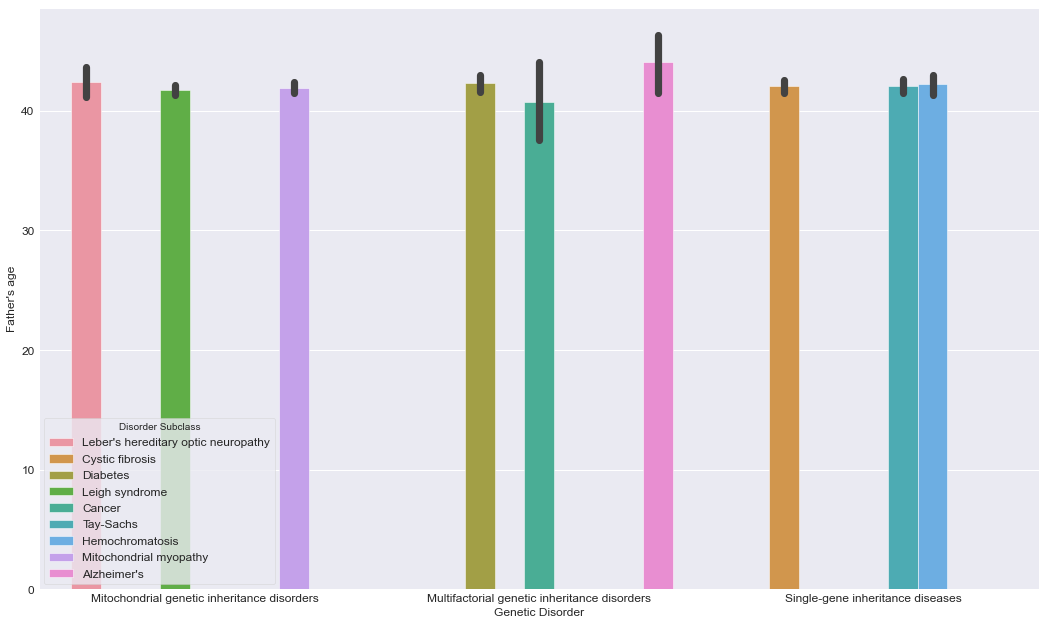

In [39]:
sns.barplot(x='Genetic Disorder',y="Father's age",hue='Disorder Subclass',data=df )

<h3>Note:</h3>in num_features there are

#### Num05: No. of previous abortion

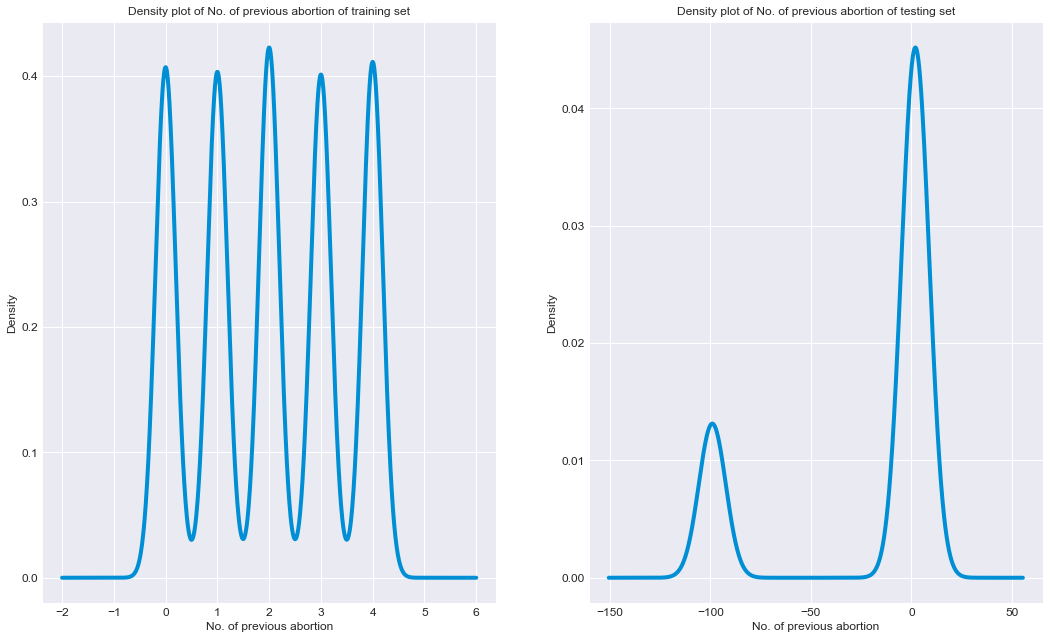

In [40]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df,df_test,"No. of previous abortion")

<h3>Note:</h3>Distribution of Feature "No. of previous abortion" of training and testing dataset is not very similar

<AxesSubplot:ylabel='No. of previous abortion'>

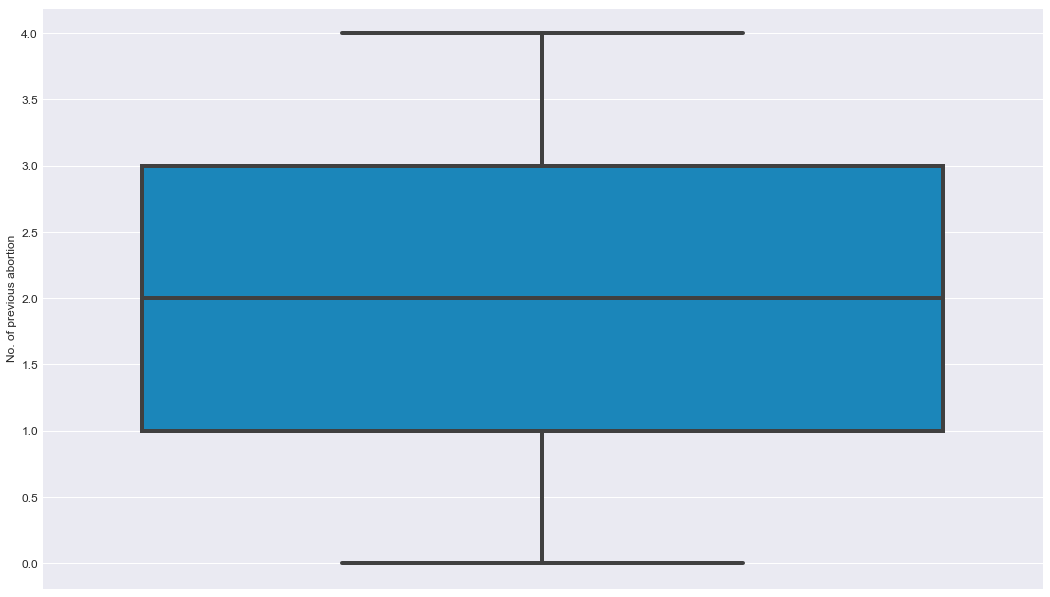

In [41]:
sns.boxplot(y="No. of previous abortion",data=df)

<AxesSubplot:xlabel='Genetic Disorder', ylabel='No. of previous abortion'>

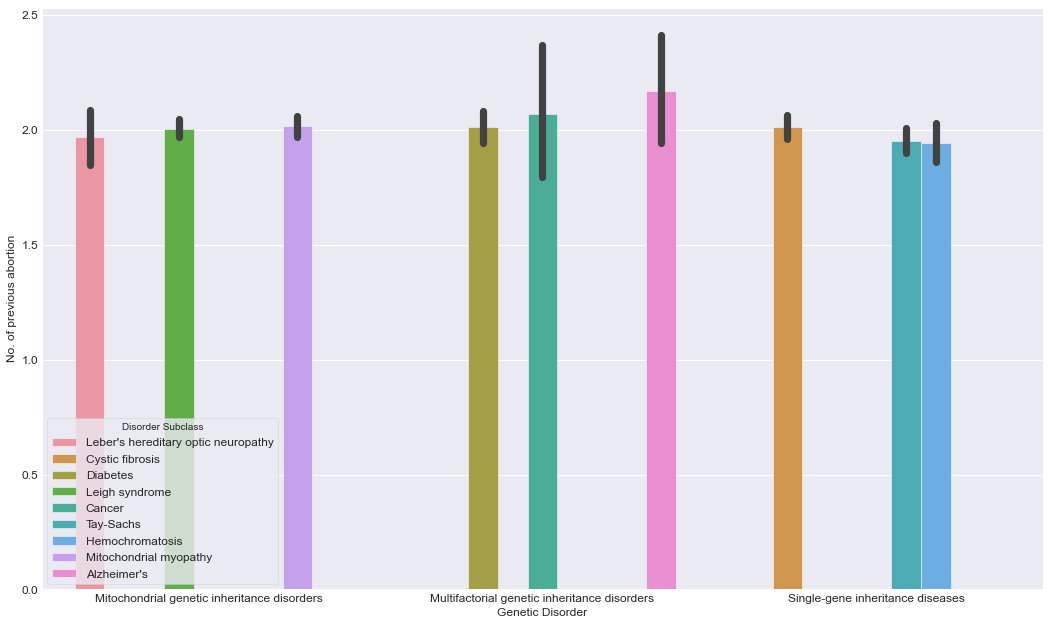

In [42]:
sns.barplot(x='Genetic Disorder',y="No. of previous abortion",hue='Disorder Subclass',data=df )

In [43]:
df["No. of previous abortion"].value_counts()

2.00    4117
4.00    4005
0.00    3964
1.00    3928
3.00    3907
Name: No. of previous abortion, dtype: int64

#### Num06: White Blood cell count (thousand per microliter)

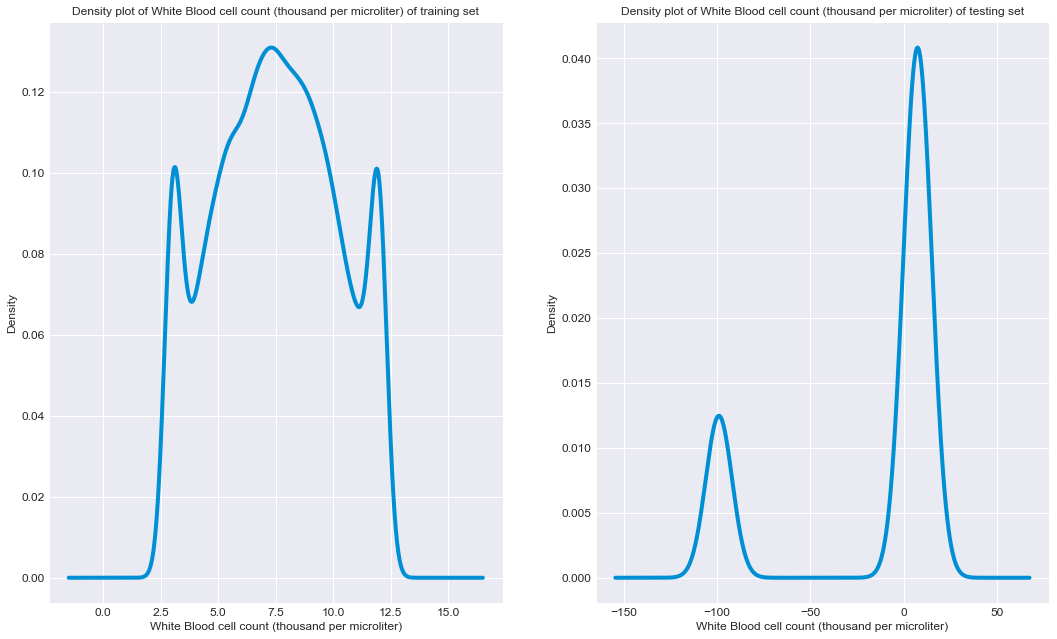

In [44]:
## Comparing the density plot of features in training and testing set
comparing_train_and_test_feature(df,df_test,"White Blood cell count (thousand per microliter)")

<h3>Note:</h3>Distribution of Feature "White Blood cell count (thousand per microliter)" of training and testing dataset is not similar

# Task 3 - Data preparation

In [45]:
## Removing the set of features which is not related to target variable
## "Patient First Name, Family Name, Father's name, Institute Name, Location of Institute, Parental consent, Place of birth"

df.drop(["Patient Id","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute",
             "Test 1","Test 2","Test 3","Test 4","Test 5","Parental consent","Place of birth","Symptom 4"],inplace=True,axis=1)

df_test.drop(["Patient Id","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute",
             "Test 1","Test 2","Test 3","Test 4","Test 5","Parental consent","Place of birth","Symptom 4"],inplace=True,axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

#### Replacing extra values in multiple column which is not related to that particular column

In [47]:
df['Birth asphyxia'].replace(['No record', 'Not available'],[np.nan,np.nan],inplace=True)
df['Autopsy shows birth defect (if applicable)'].replace(['Not applicable', 'None'],[np.nan,np.nan],inplace=True)
df['H/O radiation exposure (x-ray)'].replace(['-', 'Not applicable'],[np.nan,np.nan],inplace=True)
df['H/O substance abuse'].replace(['-', 'Not available'],[np.nan,np.nan],inplace=True)

df_test['Birth asphyxia'].replace(['No record', 'Not available'],[np.nan,np.nan],inplace=True)
df_test['Autopsy shows birth defect (if applicable)'].replace(['Not applicable', 'None'],[np.nan,np.nan],inplace=True)
df_test['H/O radiation exposure (x-ray)'].replace(['-', 'Not applicable'],[np.nan,np.nan],inplace=True)
df_test['H/O substance abuse'].replace(['-', 'Not available'],[np.nan,np.nan],inplace=True)

In [48]:
df.describe()

Patient Age  Blood cell count (mcL)  Mother's age  Father's age  No. of previous abortion  White Blood cell count (thousand per microliter)  Symptom 1  Symptom 2  Symptom 3  Symptom 5
count     20656.00                22083.00      16047.00      16097.00                  19921.00                                          19935.00   19928.00   19861.00   19982.00   19930.00
mean          6.97                    4.90         34.53         41.97                      2.00                                              7.49       0.59       0.55       0.54       0.46
std           4.32                    0.20          9.85         13.04                      1.41                                              2.65       0.49       0.50       0.50       0.50
min           0.00                    4.09         18.00         20.00                      0.00                                              3.00       0.00       0.00       0.00       0.00
25%           3.00                    4.76         26.00         31.00                      1.00                                              5.42       0.00       0.00       0.00       0.00
50%           7.00                    4.90         35.00         42.00                      2.00                                              7.48       1.00       1.00       1.00       0.00
75%          11.00                    5.03         43.00         53.00                      3.00                                              9.53       1.00       1.00       1.00       1.00
max          14.00                    5.61         51.00         64.00                      4.00                                             12.00       1.00       1.00       1.00       1.00

### Replacing null values

In [49]:
## Copying the train dataframe into new dataframe and we will be performing changes on the new dataframe
df_cpy = df.copy()

Since, there are missing values in training data, so we have to make arrangments for them and therefore replacing the missing values using statistical tools like mean, median and mode.

In [50]:
df_cpy["Patient Age"].replace(np.nan, df_cpy["Patient Age"].mean(), inplace = True)
df_cpy["Mother\'s age"].replace(np.nan, df_cpy["Mother\'s age"].mean(), inplace = True)
df_cpy["Father\'s age"].replace(np.nan, df_cpy["Father\'s age"].mean(), inplace = True)
df_cpy["No. of previous abortion"].replace(np.nan, df_cpy["No. of previous abortion"].median(), inplace = True)
df_cpy["White Blood cell count (thousand per microliter)"].replace(np.nan, df_cpy["White Blood cell count (thousand per microliter)"].median(), inplace = True)
df_cpy["Symptom 1"].replace(np.nan, df_cpy["Symptom 1"].mode().iloc[0], inplace = True)
df_cpy["Symptom 2"].replace(np.nan, df_cpy["Symptom 2"].mode().iloc[0], inplace = True)
df_cpy["Symptom 3"].replace(np.nan, df_cpy["Symptom 3"].mode().iloc[0], inplace = True)
#df_cpy["Symptom 4"].replace(np.nan, df_cpy["Symptom 4"].mode().iloc[0], inplace = True)
df_cpy["Symptom 5"].replace(np.nan, df_cpy["Symptom 5"].mode().iloc[0], inplace = True)

# We will replace the null values of object category to the mode of the features
df_cpy["Genes in mother\'s side"].replace(np.nan, df_cpy["Genes in mother\'s side"].mode().iloc[0], inplace = True)
df_cpy["Inherited from father"].replace(np.nan, df_cpy["Inherited from father"].mode().iloc[0], inplace = True)
df_cpy["Maternal gene"].replace(np.nan, df_cpy["Maternal gene"].mode().iloc[0], inplace = True)
df_cpy["Paternal gene"].replace(np.nan, df_cpy["Paternal gene"].mode().iloc[0], inplace = True)

df_cpy["Respiratory Rate (breaths/min)"].replace(np.nan, df_cpy["Respiratory Rate (breaths/min)"].mode().iloc[0], inplace = True)
df_cpy["Heart Rate (rates/min"].replace(np.nan, df_cpy["Heart Rate (rates/min"].mode().iloc[0], inplace = True)

df_cpy["Follow-up"].replace(np.nan, df_cpy["Follow-up"].mode().iloc[0], inplace = True)
df_cpy["Gender"].replace(np.nan, df_cpy["Gender"].mode().iloc[0], inplace = True)
df_cpy["Birth asphyxia"].replace(np.nan, df_cpy["Birth asphyxia"].mode().iloc[0], inplace = True)
df_cpy["Autopsy shows birth defect (if applicable)"].replace(np.nan, df_cpy["Autopsy shows birth defect (if applicable)"].mode().iloc[0], inplace = True)

df_cpy["Folic acid details (peri-conceptional)"].replace(np.nan, df_cpy["Folic acid details (peri-conceptional)"].mode().iloc[0], inplace = True)
df_cpy["H/O serious maternal illness"].replace(np.nan, df_cpy["H/O serious maternal illness"].mode().iloc[0], inplace = True)
df_cpy["H/O radiation exposure (x-ray)"].replace(np.nan, df_cpy["H/O radiation exposure (x-ray)"].mode().iloc[0], inplace = True)
df_cpy["H/O substance abuse"].replace(np.nan, df_cpy["H/O substance abuse"].mode().iloc[0], inplace = True)
df_cpy["Assisted conception IVF/ART"].replace(np.nan, df_cpy["Assisted conception IVF/ART"].mode().iloc[0], inplace = True)
df_cpy["History of anomalies in previous pregnancies"].replace(np.nan, df_cpy["History of anomalies in previous pregnancies"].mode().iloc[0], inplace = True)
df_cpy["Birth defects"].replace(np.nan, df_cpy["Birth defects"].mode().iloc[0], inplace = True)
df_cpy["Blood test result"].replace(np.nan, df_cpy["Blood test result"].mode().iloc[0], inplace = True)

In [51]:
df_cpy.dropna(inplace= True, axis= 0)

<h3>Note:</h3>As we saw there are some extra values are there which is not related to features in testing.

i.e. -99 is the most common and only value.

In [52]:
# This returns the frequency distribution of each category in the feature.
df_cpy.isnull().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ray)                      0
H/O substance abuse         

In [53]:
# Code to test the distribution of categorical feature

'''
temp = "Test 2"

print(df_cpy[temp].describe())
print("---------------------------")
print(df_cpy[temp].mode())
print("---------------------------")
df[temp].hist()
'''

'\ntemp = "Test 2"\n\nprint(df_cpy[temp].describe())\nprint("---------------------------")\nprint(df_cpy[temp].mode())\nprint("---------------------------")\ndf[temp].hist()\n'

In [54]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 22082
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       18047 non-null  float64
 1   Genes in mother's side                            18047 non-null  object 
 2   Inherited from father                             18047 non-null  object 
 3   Maternal gene                                     18047 non-null  object 
 4   Paternal gene                                     18047 non-null  object 
 5   Blood cell count (mcL)                            18047 non-null  float64
 6   Mother's age                                      18047 non-null  float64
 7   Father's age                                      18047 non-null  float64
 8   Status                                            18047 non-null  object 
 9   Respiratory Rate 

In [55]:
df_cpy.dropna(how='any',axis=0,inplace=True)
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 22082
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       18047 non-null  float64
 1   Genes in mother's side                            18047 non-null  object 
 2   Inherited from father                             18047 non-null  object 
 3   Maternal gene                                     18047 non-null  object 
 4   Paternal gene                                     18047 non-null  object 
 5   Blood cell count (mcL)                            18047 non-null  float64
 6   Mother's age                                      18047 non-null  float64
 7   Father's age                                      18047 non-null  float64
 8   Status                                            18047 non-null  object 
 9   Respiratory Rate 

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       9465 non-null   int64  
 1   Genes in mother's side                            9465 non-null   object 
 2   Inherited from father                             8914 non-null   object 
 3   Maternal gene                                     5742 non-null   object 
 4   Paternal gene                                     9465 non-null   object 
 5   Blood cell count (mcL)                            9465 non-null   float64
 6   Mother's age                                      9465 non-null   int64  
 7   Father's age                                      9465 non-null   int64  
 8   Status                                            9465 non-null   object 
 9   Respiratory Rate (b

In [57]:
df_cpy.nunique()

Patient Age                                            16
Genes in mother's side                                  2
Inherited from father                                   2
Maternal gene                                           2
Paternal gene                                           2
Blood cell count (mcL)                              18047
Mother's age                                           35
Father's age                                           46
Status                                                  2
Respiratory Rate (breaths/min)                          2
Heart Rate (rates/min                                   2
Follow-up                                               2
Gender                                                  3
Birth asphyxia                                          2
Autopsy shows birth defect (if applicable)              2
Folic acid details (peri-conceptional)                  2
H/O serious maternal illness                            2
H/O radiation 

In [58]:
# Categorical boolean mask
categorical_feature_mask = df_cpy.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df_cpy.columns[categorical_feature_mask].tolist()

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df_cpy[categorical_cols] = df_cpy[categorical_cols].apply(lambda col: le.fit_transform(col))
df_cpy[categorical_cols].head(10)

Genes in mother's side  Inherited from father  Maternal gene  Paternal gene  Status  Respiratory Rate (breaths/min)  Heart Rate (rates/min  Follow-up  Gender  Birth asphyxia  Autopsy shows birth defect (if applicable)  Folic acid details (peri-conceptional)  H/O serious maternal illness  H/O radiation exposure (x-ray)  H/O substance abuse  Assisted conception IVF/ART  \
0                        1                      0              1              0       0                               0                      0          0       0               1                                           1                                       0                             0                               0                    0                            0   
2                        1                      0              0              0       0                               0                      1          1       0               1                                           1                                       1                             0                               1                    0                            1   
3                        1                      0              1              0       1                               1                      0          0       2               1                                           0                                       0                             1                               0                    1                            1   
4                        1                      0              1              1       0                               1                      1          1       2               1                                           1                                       0                             1                               0                    1                            1   
5                        1                      0              1              0       1                               0                      0          1       1               1                                           1                                       0                             0                               0                    0                            1   
6                        1                      0              1              1       0                               0                      0          1       2               1                                           1                                       1                             1                               0                    1                            1   
7                        0                      0              1              1       0                               1                      0          1       0               1                                           1                                       1                             1                               0                    0                            0   
8                        0                      0              1              0       0                               1                      1          1       2               1                                           1                                       1                             1                               0                    0                            0   
9                        0                      1              1              1       0                               1                      1          1       2               0                                           1                                       1                             0                               0                    0                            1   
10                       1                      0              1              0       1                               1                      0          1       2               1                                           1             

In [59]:
df_cpy.head(3)

Patient Age  Genes in mother's side  Inherited from father  Maternal gene  Paternal gene  Blood cell count (mcL)  Mother's age  Father's age  Status  Respiratory Rate (breaths/min)  Heart Rate (rates/min  Follow-up  Gender  Birth asphyxia  Autopsy shows birth defect (if applicable)  Folic acid details (peri-conceptional)  H/O serious maternal illness  H/O radiation exposure (x-ray)  \
0         2.00                       1                      0              1              0                    4.76         34.53         41.97       0                               0                      0          0       0               1                                           1                                       0                             0                               0   
2         6.00                       1                      0              0              0                    4.89         41.00         22.00       0                               0                      1          1       0               1                                           1                                       1                             0                               1   
3        12.00                       1                      0              1              0                    4.71         21.00         41.97       1                               1                      0          0       2               1                                           0                                       0                             1                               0   

   H/O substance abuse  Assisted conception IVF/ART  History of anomalies in previous pregnancies  No. of previous abortion  Birth defects  White Blood cell count (thousand per microliter)  Blood test result  Symptom 1  Symptom 2  Symptom 3  Symptom 5  Genetic Disorder  Disorder Subclass  
0                    0                            0                                             1                      2.00              1                                              9.86                  3       1.00       1.00       1.00       1.00                 0                  5  
2                    0                            1                                             1                      4.00              1                                              7.48                  2       0.00       1.00       1.00       1.00                 1                  3  
3                    1                            1                                             1                      1.00              1                                              7.92                  1       0.00       0.00       1.00       0.00                 0                  6

In [60]:
## Creating a function which will convert categorical features(Binary, Nominal and Ordinal) using dummy variables

def oneHotEncoding(dum):
    df_dum = pd.get_dummies(df_cpy[dum])
    df_test_dum = pd.get_dummies(df_test[dum])
    return df_dum, df_test_dum

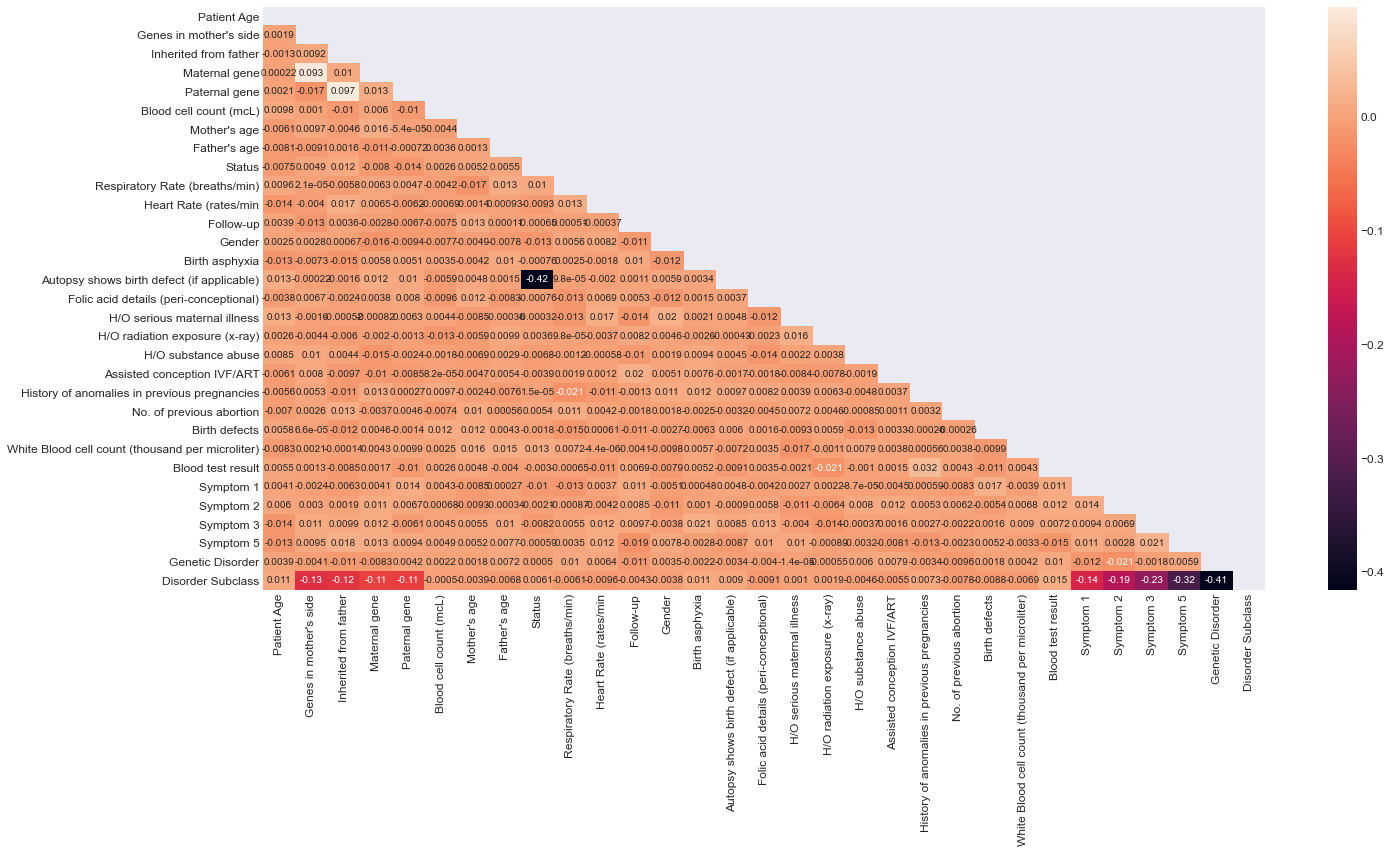

In [61]:
corr = df_cpy.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

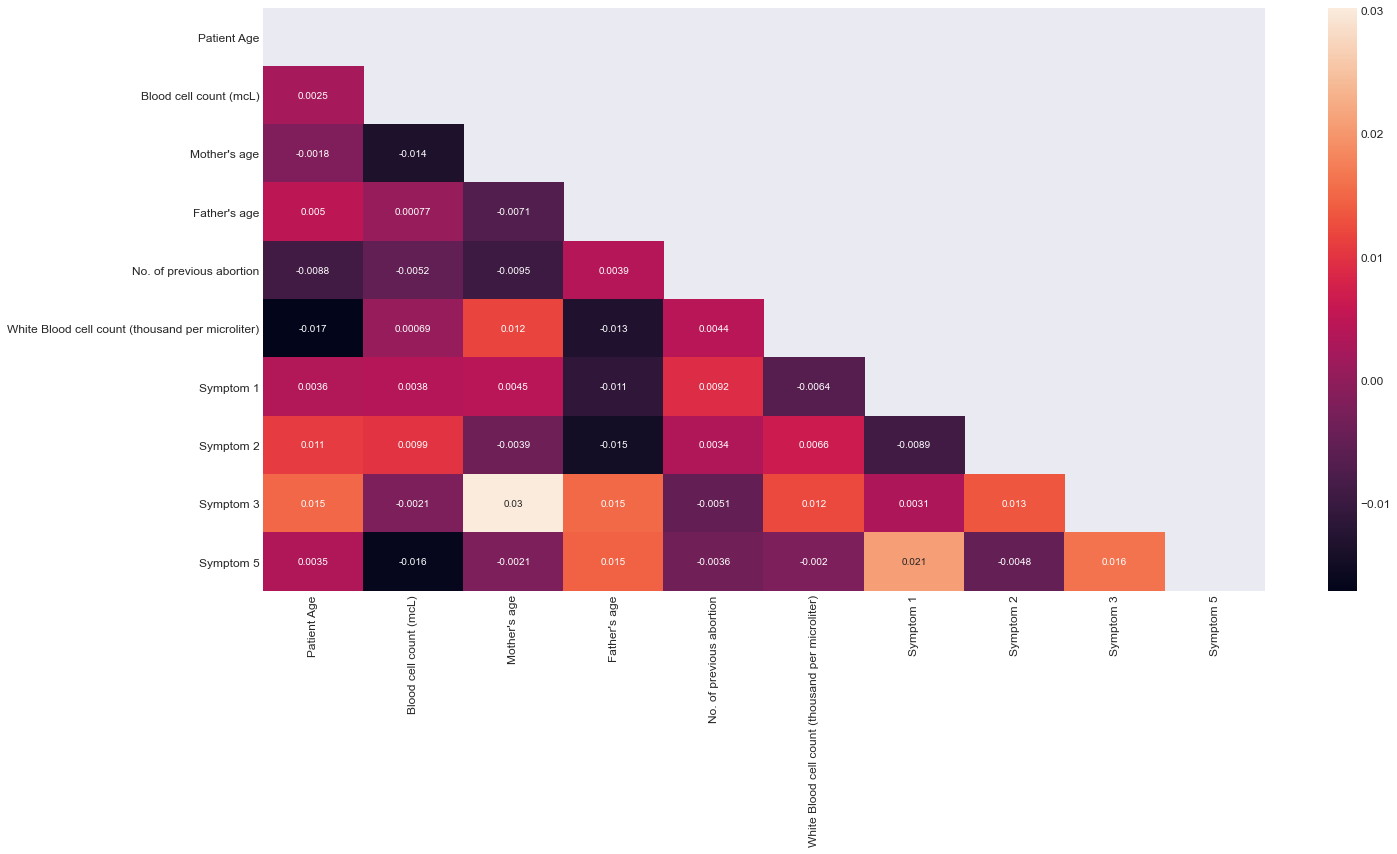

In [62]:
corr = df_test.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

# Task 4 - Data modelling

#### Model Creation and comparison from other model

# Prediction Process: 1

In [63]:
Genetic_Disorder_Data = df_cpy.drop(["Status","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Birth asphyxia",
                "Autopsy shows birth defect (if applicable)","H/O radiation exposure (x-ray)",
                "H/O substance abuse", "Birth defects", "Disorder Subclass"], axis=1)


Disorder_Subclass_Data = df_cpy.drop(["Status","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Birth asphyxia",
                "Autopsy shows birth defect (if applicable)","H/O radiation exposure (x-ray)",
                "H/O substance abuse", "Birth defects", "Genetic Disorder"], axis=1)

In [64]:
Genetic_Disorder_Data

Patient Age  Genes in mother's side  Inherited from father  Maternal gene  Paternal gene  Blood cell count (mcL)  Mother's age  Father's age  Follow-up  Gender  Folic acid details (peri-conceptional)  H/O serious maternal illness  Assisted conception IVF/ART  History of anomalies in previous pregnancies  No. of previous abortion  White Blood cell count (thousand per microliter)  \
0             2.00                       1                      0              1              0                    4.76         34.53         41.97          0       0                                       0                             0                            0                                             1                      2.00                                              9.86   
2             6.00                       1                      0              0              0                    4.89         41.00         22.00          1       0                                       1                             0                            1                                             1                      4.00                                              7.48   
3            12.00                       1                      0              1              0                    4.71         21.00         41.97          0       2                                       0                             1                            1                                             1                      1.00                                              7.92   
4            11.00                       1                      0              1              1                    4.72         32.00         41.97          1       2                                       0                             1                            1                                             0                      4.00                                              4.10   
5            14.00                       1                      0              1              0                    5.10         34.53         41.97          1       1                                       0                             0                            1                                             0                      0.00                                             10.27   
...            ...                     ...                    ...            ...            ...                     ...           ...           ...        ...     ...                                     ...                           ...                          ...                                           ...                       ...                                               ...   
22077         9.00                       0                      1              1              1                    5.01         47.00         41.97          1       0                                       1                             0                            1                                             1                      2.00                                             12.00   
22078         4.00                       1                      1              1              0                    5.26         35.00         64.00          0       1                                       1                             0                            1                                             0                      3.00                                              6.58   
22079         8.00                       0                      1              0              1                    4.97         34.53         56.00          0       0                                       1                             1                            1                                             0                      2.00                                              7.04   
22080         8.00                       1                      0              1              0  

In [65]:
Genetic_X = Genetic_Disorder_Data.drop("Genetic Disorder",axis=1)
Genetic_Y = Genetic_Disorder_Data["Genetic Disorder"]

GenSub_X = Disorder_Subclass_Data.drop("Disorder Subclass",axis=1)
GenSub_Y = Disorder_Subclass_Data["Disorder Subclass"]

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(Genetic_X, Genetic_Y, test_size= 0.25)

<h3>Note:</h3>The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

In [67]:
Scaler_Function = StandardScaler()

x_train = Scaler_Function.fit_transform(x_train)
x_test = Scaler_Function.fit_transform(x_test)

In [68]:
### Creating the function for sample Model

scores = {}
acc = []
cv_scores = []

def model(model):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print("Accuracy = {}".format(score))
    
    cv_score = cross_val_score(model,x_train,y_train,cv=5)
    print("Cross Validation Score = {}".format(np.mean(cv_score)))
    
    acc.append(score)
    cv_scores.append(np.mean(cv_score))

In [69]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()

model(XGBC)

[16:09:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.5095301418439716
[16:09:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softp

In [70]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model(lg)

Accuracy = 0.5250443262411347
Cross Validation Score = 0.5188769855929072


In [71]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
model(RFC)

Accuracy = 0.5230496453900709
Cross Validation Score = 0.5285555966014037


In [72]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
model(DTC)

Accuracy = 0.4457003546099291
Cross Validation Score = 0.4535648319172516


In [73]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
model(KNC)

Accuracy = 0.48182624113475175
Cross Validation Score = 0.49117103804950124


In [74]:
from sklearn.svm import SVC
svc = SVC()
model(svc)

Accuracy = 0.5372340425531915
Cross Validation Score = 0.5384558551902475


In [75]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
model(GNB)

Accuracy = 0.5250443262411347
Cross Validation Score = 0.5208718138160325


In [76]:
from sklearn.ensemble import AdaBoostClassifier
ADBC = AdaBoostClassifier()
model(ADBC)

Accuracy = 0.5210549645390071
Cross Validation Score = 0.5158478019948283


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
model(GBC)

Accuracy = 0.538563829787234
Cross Validation Score = 0.5329146656815663


In [78]:
models = ["XGBClassifier","LogisticRegression","RandomForestClassifier","DecisionTreeClassifier",
          "KNeighborsClassifier","SVC","GaussianNB","AdaBoostClassifier","GradientBoostingClassifier"]

In [79]:
print(acc)
print(cv_scores)

[0.5095301418439716, 0.5250443262411347, 0.5230496453900709, 0.4457003546099291, 0.48182624113475175, 0.5372340425531915, 0.5250443262411347, 0.5210549645390071, 0.538563829787234]
[0.5179165127447358, 0.5188769855929072, 0.5285555966014037, 0.4535648319172516, 0.49117103804950124, 0.5384558551902475, 0.5208718138160325, 0.5158478019948283, 0.5329146656815663]


In [80]:
scores = { "Model Name" : models , "Accuracy Score" : acc, "Cross val Score": cv_scores}
score_df = pd.DataFrame(scores)
score_df

Model Name  Accuracy Score  Cross val Score
0               XGBClassifier            0.51             0.52
1          LogisticRegression            0.53             0.52
2      RandomForestClassifier            0.52             0.53
3      DecisionTreeClassifier            0.45             0.45
4        KNeighborsClassifier            0.48             0.49
5                         SVC            0.54             0.54
6                  GaussianNB            0.53             0.52
7          AdaBoostClassifier            0.52             0.52
8  GradientBoostingClassifier            0.54             0.53

Text(0.5, 1.0, 'Model Vs Accuracy Score Comparision')

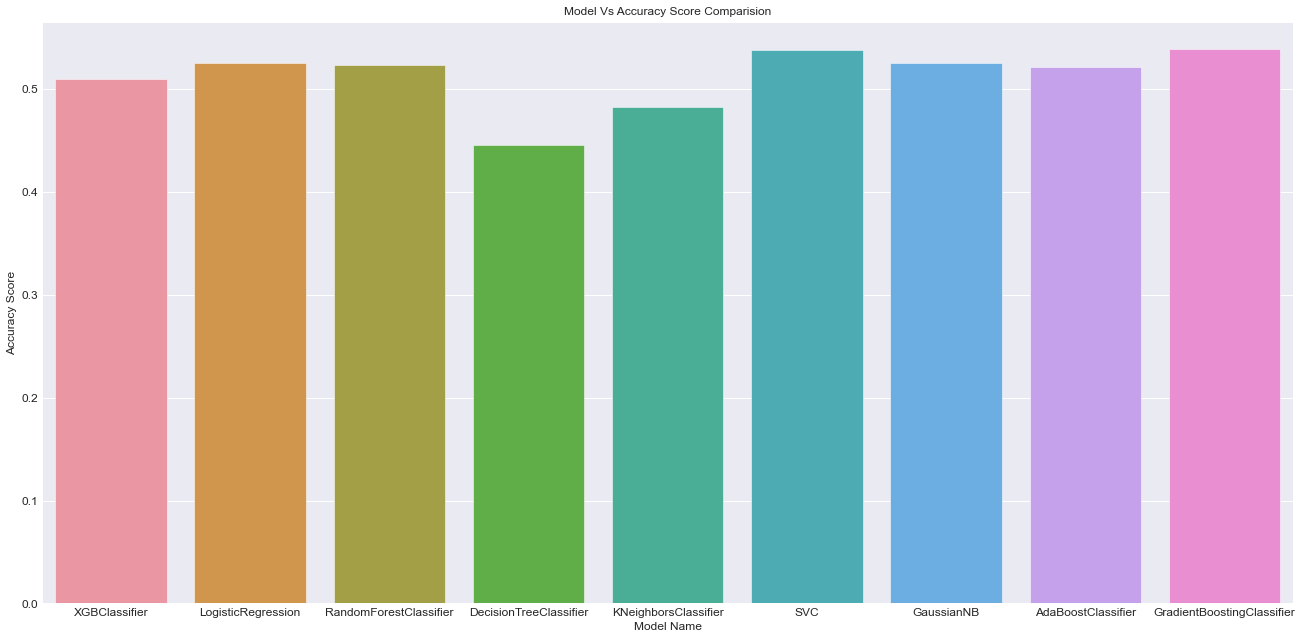

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x= 'Model Name', y= 'Accuracy Score',data= score_df)
plt.title("Model Vs Accuracy Score Comparision")

Text(0.5, 1.0, 'Model Vs Cross Validation Score Comparision')

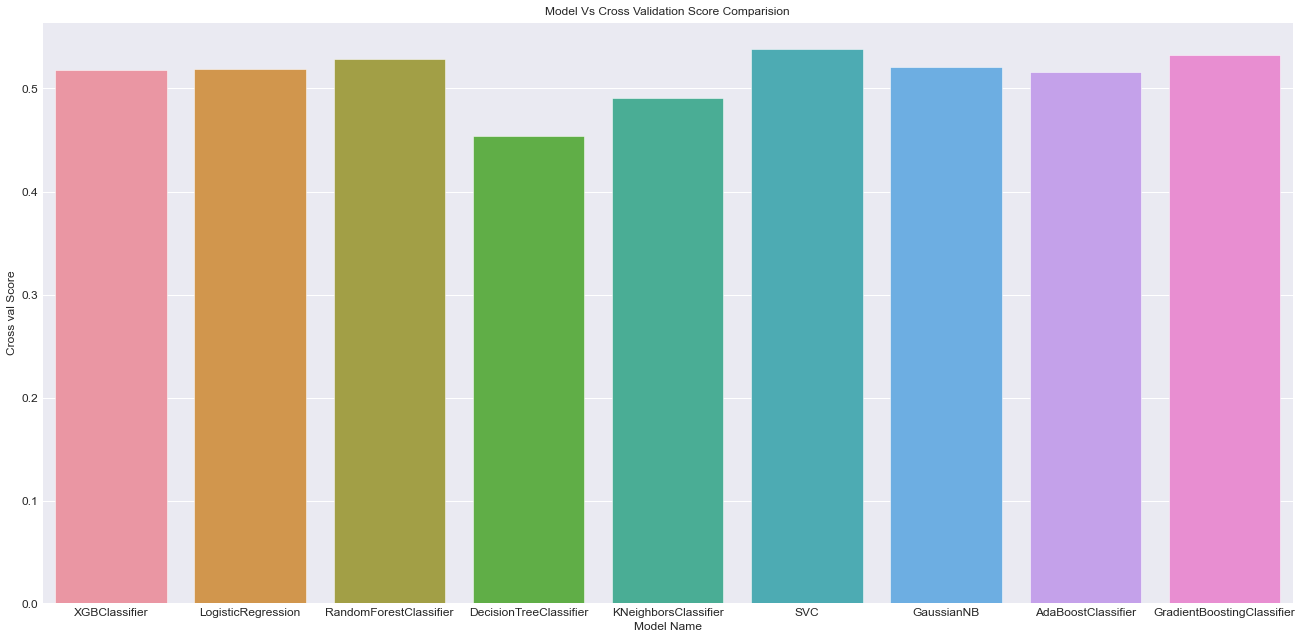

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x= 'Model Name', y= 'Cross val Score',data= score_df)
plt.title("Model Vs Cross Validation Score Comparision")

# Prediction Process: 2

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [84]:
Encode_Data = df_cpy.copy()
Encode_Data

Patient Age  Genes in mother's side  Inherited from father  Maternal gene  Paternal gene  Blood cell count (mcL)  Mother's age  Father's age  Status  Respiratory Rate (breaths/min)  Heart Rate (rates/min  Follow-up  Gender  Birth asphyxia  Autopsy shows birth defect (if applicable)  Folic acid details (peri-conceptional)  H/O serious maternal illness  H/O radiation exposure (x-ray)  \
0             2.00                       1                      0              1              0                    4.76         34.53         41.97       0                               0                      0          0       0               1                                           1                                       0                             0                               0   
2             6.00                       1                      0              0              0                    4.89         41.00         22.00       0                               0                      1          1       0               1                                           1                                       1                             0                               1   
3            12.00                       1                      0              1              0                    4.71         21.00         41.97       1                               1                      0          0       2               1                                           0                                       0                             1                               0   
4            11.00                       1                      0              1              1                    4.72         32.00         41.97       0                               1                      1          1       2               1                                           1                                       0                             1                               0   
5            14.00                       1                      0              1              0                    5.10         34.53         41.97       1                               0                      0          1       1               1                                           1                                       0                             0                               0   
...            ...                     ...                    ...            ...            ...                     ...           ...           ...     ...                             ...                    ...        ...     ...             ...                                         ...                                     ...                           ...                             ...   
22077         9.00                       0                      1              1              1                    5.01         47.00         41.97       1                               0                      0          1       0               1                                           1                                       1                             0                               0   
22078         4.00                       1                      1              1              0                    5.26         35.00         64.00       1                               0                      1          0       1               0                                           0                                       1                             0                               0   
22079         8.00                       0                      1              0              1                    4.97         34.53         56.00       0                               0                      0          0       0               0                                           1                                       1                             1                               0   
22080         8.00                       1               

In [85]:
Encode_Data.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass",
                    "Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene"},inplace=True)

In [86]:
Encode_Func = LabelEncoder()

In [87]:
Encode_Data["Genes_Mother_Side"] = Encode_Func.fit_transform(Encode_Data["Genes_Mother_Side"])
Encode_Data["Inherited_Father"] = Encode_Func.fit_transform(Encode_Data["Inherited_Father"])
Encode_Data["Maternal_Gene"] = Encode_Func.fit_transform(Encode_Data["Maternal_Gene"])
Encode_Data["Paternal_Gene"] = Encode_Func.fit_transform(Encode_Data["Paternal_Gene"])
Encode_Data["Status"] = Encode_Func.fit_transform(Encode_Data["Status"])
Encode_Data["Respiratory_Rate_Breaths_Min"] = Encode_Func.fit_transform(Encode_Data["Respiratory_Rate_Breaths_Min"])
Encode_Data["Heart_Rates_Min"] = Encode_Func.fit_transform(Encode_Data["Heart_Rates_Min"])
Encode_Data["Follow_Up"] = Encode_Func.fit_transform(Encode_Data["Follow_Up"])
Encode_Data["Gender"] = Encode_Func.fit_transform(Encode_Data["Gender"])
Encode_Data["Birth_Asphyxia"] = Encode_Func.fit_transform(Encode_Data["Birth_Asphyxia"])
Encode_Data["Autopsy_Birth_Defect"] = Encode_Func.fit_transform(Encode_Data["Autopsy_Birth_Defect"])
Encode_Data["Folic_Acid"] = Encode_Func.fit_transform(Encode_Data["Folic_Acid"])
Encode_Data["Maternal_Illness"] = Encode_Func.fit_transform(Encode_Data["Maternal_Illness"])
Encode_Data["Radiation_Exposure"] = Encode_Func.fit_transform(Encode_Data["Radiation_Exposure"])
Encode_Data["Substance_Abuse"] = Encode_Func.fit_transform(Encode_Data["Substance_Abuse"])
Encode_Data["Assisted_Conception"] = Encode_Func.fit_transform(Encode_Data["Assisted_Conception"])
Encode_Data["History_Previous_Pregnancies"] = Encode_Func.fit_transform(Encode_Data["History_Previous_Pregnancies"])
Encode_Data["Birth_Defects"] = Encode_Func.fit_transform(Encode_Data["Birth_Defects"])
Encode_Data["Blood_Test_Result"] = Encode_Func.fit_transform(Encode_Data["Blood_Test_Result"])
Encode_Data["Symptom 1"] = Encode_Func.fit_transform(Encode_Data["Symptom 1"])
Encode_Data["Symptom 2"] = Encode_Func.fit_transform(Encode_Data["Symptom 2"])
Encode_Data["Symptom 3"] = Encode_Func.fit_transform(Encode_Data["Symptom 3"])
Encode_Data["Symptom 5"] = Encode_Func.fit_transform(Encode_Data["Symptom 5"])
Encode_Data["Genetic_Disorder"] = Encode_Func.fit_transform(Encode_Data["Genetic_Disorder"])
Encode_Data["Disorder_Subclass"] = Encode_Func.fit_transform(Encode_Data["Disorder_Subclass"])

In [88]:
Encode_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 22082
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   18047 non-null  float64
 1   Genes_Mother_Side             18047 non-null  int64  
 2   Inherited_Father              18047 non-null  int64  
 3   Maternal_Gene                 18047 non-null  int64  
 4   Paternal_Gene                 18047 non-null  int64  
 5   Blood_Cell_mcL                18047 non-null  float64
 6   Mother_Age                    18047 non-null  float64
 7   Father_Age                    18047 non-null  float64
 8   Status                        18047 non-null  int64  
 9   Respiratory_Rate_Breaths_Min  18047 non-null  int64  
 10  Heart_Rates_Min               18047 non-null  int64  
 11  Follow_Up                     18047 non-null  int64  
 12  Gender                        18047 non-null  int64  
 13  B

In [89]:
Encode_Data.head(5)

Patient_Age  Genes_Mother_Side  Inherited_Father  Maternal_Gene  Paternal_Gene  Blood_Cell_mcL  Mother_Age  Father_Age  Status  Respiratory_Rate_Breaths_Min  Heart_Rates_Min  Follow_Up  Gender  Birth_Asphyxia  Autopsy_Birth_Defect  Folic_Acid  Maternal_Illness  Radiation_Exposure  Substance_Abuse  Assisted_Conception  History_Previous_Pregnancies  Previous_Abortion  Birth_Defects  \
0         2.00                  1                 0              1              0            4.76       34.53       41.97       0                             0                0          0       0               1                     1           0                 0                   0                0                    0                             1               2.00              1   
2         6.00                  1                 0              0              0            4.89       41.00       22.00       0                             0                1          1       0               1                     1           1                 0                   1                0                    1                             1               4.00              1   
3        12.00                  1                 0              1              0            4.71       21.00       41.97       1                             1                0          0       2               1                     0           0                 1                   0                1                    1                             1               1.00              1   
4        11.00                  1                 0              1              1            4.72       32.00       41.97       0                             1                1          1       2               1                     1           0                 1                   0                1                    1                             0               4.00              0   
5        14.00                  1                 0              1              0            5.10       34.53       41.97       1                             0                0          1       1               1                     1           0                 0                   0                0                    1                             0               0.00              0   

   White_Blood_Cell  Blood_Test_Result  Symptom 1  Symptom 2  Symptom 3  Symptom 5  Genetic_Disorder  Disorder_Subclass  
0              9.86                  3          1          1          1          1                 0                  5  
2              7.48                  2          0          1          1          1                 1                  3  
3              7.92                  1          0          0          1          0                 0                  6  
4              4.10                  3          0          0          0          0                 1                  1  
5             10.27                  2          1          0          0          0                 2                  2

In [90]:
Genetic_Disorder_Data = Encode_Data.drop("Disorder_Subclass",axis=1)
Disorder_Subclass_Data = Encode_Data.drop("Genetic_Disorder",axis=1)

In [91]:
GENETIC_X =  Genetic_Disorder_Data.drop("Genetic_Disorder",axis=1)
GENETIC_Y = Genetic_Disorder_Data["Genetic_Disorder"]

In [92]:
GX_Train,GX_Test,GY_Train,GY_Test = train_test_split(GENETIC_X,GENETIC_Y,test_size=0.2,random_state=42,shuffle=True)

print("X TRAIN SHAPE: ",GX_Train.shape)
print("X TEST SHAPE: ",GX_Test.shape)
print("Y TRAIN SHAPE: ",GY_Train.shape)
print("Y TEST SHAPE: ",GY_Test.shape)

X TRAIN SHAPE:  (14437, 29)
X TEST SHAPE:  (3610, 29)
Y TRAIN SHAPE:  (14437,)
Y TEST SHAPE:  (3610,)


#### Normalizing

In [93]:
Scaler_Function = StandardScaler()

GX_Train = Scaler_Function.fit_transform(GX_Train)
GX_Test = Scaler_Function.fit_transform(GX_Test)

In [94]:
XGBC = XGBClassifier().fit(GX_Train,GY_Train)
lg = LogisticRegression(solver="liblinear").fit(GX_Train,GY_Train)
RFC = RandomForestClassifier(random_state=42,verbose=False).fit(GX_Train,GY_Train)
DTC = DecisionTreeClassifier(random_state=42).fit(GX_Train,GY_Train)
KNC = KNeighborsClassifier().fit(GX_Train,GY_Train)
svc = SVC().fit(GX_Train,GY_Train)
GNB = GaussianNB().fit(GX_Train,GY_Train)
ADBC = AdaBoostClassifier().fit(GX_Train,GY_Train)
GBC = GradientBoostingClassifier(verbose=False).fit(GX_Train,GY_Train)

[16:11:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [95]:
model_List = [XGBC, lg, RFC, DTC, KNC, svc, GNB, ADBC, GBC]

In [96]:
for model in model_List:
    name = model.__class__.__name__
    predict = model.predict(GX_Test)
    R2CV = cross_val_score(model,GX_Test,GY_Test,cv=10,verbose=False).mean()
    error = -cross_val_score(model,GX_Test,GY_Test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 20)
    print("ACC-->",accuracy_score(GY_Test,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 50)

[16:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

### ACCURACY VISUALIZATION

[16:13:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

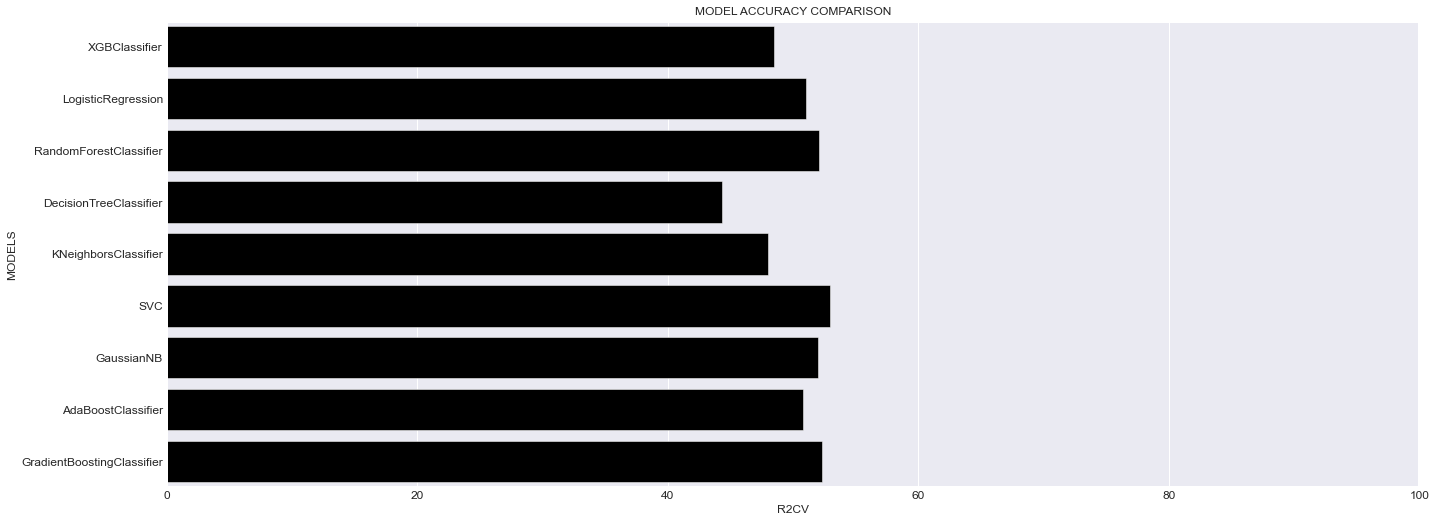

In [97]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in model_List:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,x_test,y_test,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

### ERROR VISUALIZATION

[16:13:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

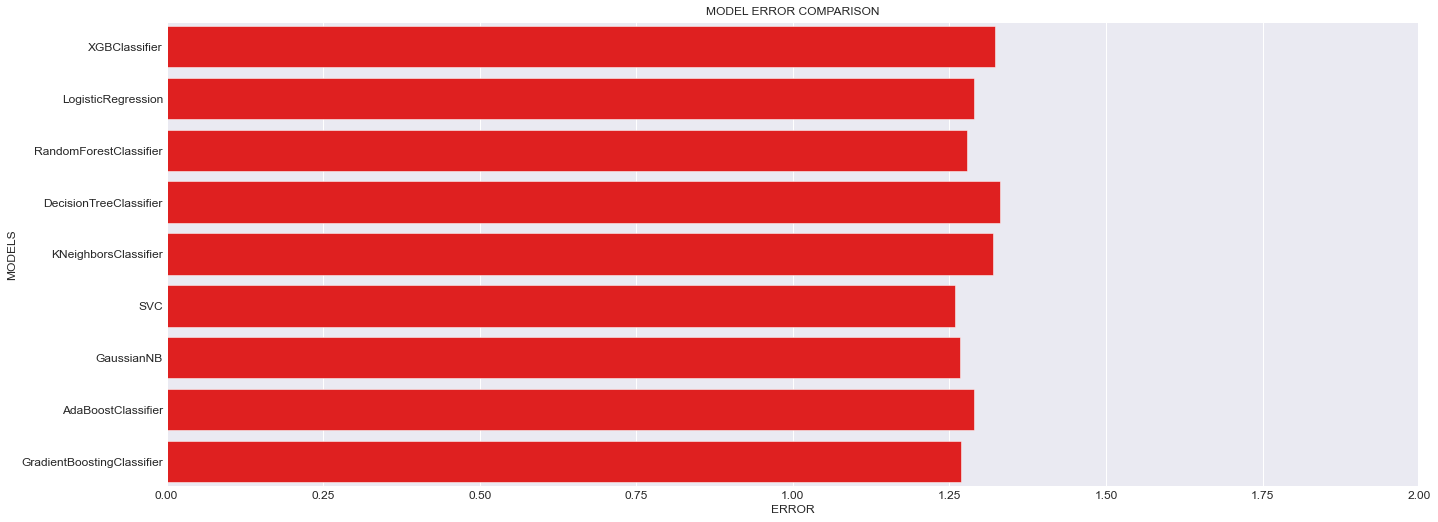

In [98]:
r = pd.DataFrame(columns=["MODELS","error"])
for model in model_List:
    name = model.__class__.__name__
    error = -cross_val_score(model,x_test,y_test,cv=10,scoring="neg_mean_squared_error").mean()
    result = pd.DataFrame([[name,np.sqrt(error)]],columns=["MODELS","error"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="error",y="MODELS",data=r,color="r")
plt.xlabel("ERROR")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON")
plt.show()

# Prediction Process: 3

In [99]:
pre_three_data = df.copy()

pre_three_data.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass",
                    "Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene"},inplace=True)

In [100]:
pre_three_data = pre_three_data.reset_index(drop= True)
pre_three_data

Patient_Age Genes_Mother_Side Inherited_Father Maternal_Gene Paternal_Gene  Blood_Cell_mcL  Mother_Age  Father_Age    Status Respiratory_Rate_Breaths_Min Heart_Rates_Min Follow_Up     Gender Birth_Asphyxia Autopsy_Birth_Defect Folic_Acid Maternal_Illness Radiation_Exposure Substance_Abuse Assisted_Conception History_Previous_Pregnancies  Previous_Abortion Birth_Defects  White_Blood_Cell  \
0             2.00               Yes               No           Yes            No            4.76         nan         nan     Alive               Normal (30-60)          Normal      High        NaN            NaN                  NaN         No              NaN                 No              No                  No                          Yes                nan           NaN              9.86   
1             4.00               Yes              Yes            No            No            4.91         nan       23.00  Deceased                    Tachypnea          Normal      High        NaN             No                  NaN        Yes              Yes                NaN  Not applicable                  No                          Yes                nan      Multiple              5.52   
2             6.00               Yes               No            No            No            4.89       41.00       22.00     Alive               Normal (30-60)     Tachycardia       Low        NaN            NaN                  NaN        Yes               No                Yes             NaN                 Yes                          Yes               4.00      Singular               nan   
3            12.00               Yes               No           Yes            No            4.71       21.00         nan  Deceased                    Tachypnea          Normal      High       Male            NaN                   No         No              Yes                NaN  Not applicable                 NaN                          Yes               1.00      Singular              7.92   
4            11.00               Yes               No           NaN           Yes            4.72       32.00         nan     Alive                    Tachypnea     Tachycardia       Low       Male            NaN                  NaN         No              Yes                NaN  Not applicable                 Yes                           No               4.00      Multiple              4.10   
...            ...               ...              ...           ...           ...             ...         ...         ...       ...                          ...             ...       ...        ...            ...                  ...        ...              ...                ...             ...                 ...                          ...                ...           ...               ...   
22078         4.00               Yes              Yes           Yes            No            5.26       35.00       64.00  Deceased               Normal (30-60)     Tachycardia      High     Female             No                   No        NaN               No                NaN              No                 Yes                           No               3.00      Multiple              6.58   
22079         8.00                No              Yes            No           Yes            4.97         nan       56.00     Alive               Normal (30-60)          Normal      High  Ambiguous             No                  NaN        Yes              Yes                 No             NaN                 Yes                           No               2.00      Multiple              7.04   
22080         8.00               Yes               No           Yes            No            5.19       35.00       51.00  Deceased                    Tachypnea          Normal      High       Male             No                  NaN         No               No                NaN              No                  No                           No               2.00      Singular              7.72   
22081  

In [101]:
pre_three_data["Inherited_Father"].fillna(pre_three_data["Inherited_Father"].mode()[0], inplace=True)
pre_three_data["Maternal_Gene"].fillna(pre_three_data["Maternal_Gene"].mode()[0], inplace=True)
pre_three_data["Respiratory_Rate_Breaths_Min"].fillna(pre_three_data["Respiratory_Rate_Breaths_Min"].mode()[0], inplace=True)
pre_three_data["Heart_Rates_Min"].fillna(pre_three_data["Heart_Rates_Min"].mode()[0], inplace=True)
pre_three_data["Follow_Up"].fillna(pre_three_data["Follow_Up"].mode()[0], inplace=True)
pre_three_data["Gender"].fillna(pre_three_data["Gender"].mode()[0], inplace=True)
pre_three_data["Birth_Asphyxia"].fillna(pre_three_data["Birth_Asphyxia"].mode()[0], inplace=True)
pre_three_data["Autopsy_Birth_Defect"].fillna(pre_three_data["Autopsy_Birth_Defect"].mode()[0], inplace=True)
pre_three_data["Folic_Acid"].fillna(pre_three_data["Folic_Acid"].mode()[0], inplace=True)
pre_three_data["Maternal_Illness"].fillna(pre_three_data["Maternal_Illness"].mode()[0], inplace=True)
pre_three_data["Radiation_Exposure"].fillna(pre_three_data["Radiation_Exposure"].mode()[0], inplace=True)
pre_three_data["Substance_Abuse"].fillna(pre_three_data["Substance_Abuse"].mode()[0], inplace=True)
pre_three_data["Assisted_Conception"].fillna(pre_three_data["Assisted_Conception"].mode()[0], inplace=True)
pre_three_data["History_Previous_Pregnancies"].fillna(pre_three_data["History_Previous_Pregnancies"].mode()[0], inplace=True)
pre_three_data["Birth_Defects"].fillna(pre_three_data["Birth_Defects"].mode()[0], inplace=True)
pre_three_data["Blood_Test_Result"].fillna(pre_three_data["Blood_Test_Result"].mode()[0], inplace=True)
pre_three_data["Mother_Age"].fillna(pre_three_data.groupby(["Disorder_Subclass"])["Mother_Age"].transform("mean"),inplace=True)
pre_three_data["Father_Age"].fillna(pre_three_data.groupby(["Disorder_Subclass"])["Father_Age"].transform("mean"),inplace=True)
pre_three_data["Previous_Abortion"].fillna(pre_three_data.groupby(["Disorder_Subclass"])["Previous_Abortion"].transform("mean"),inplace=True)
pre_three_data["White_Blood_Cell"].fillna(pre_three_data.groupby(["Disorder_Subclass"])["White_Blood_Cell"].transform("mean"),inplace=True)

In [102]:
pre_three_data.dropna(inplace=True,axis=0)

In [103]:
print("NAN VALUES:\n")
print(pre_three_data.isna().sum())

NAN VALUES:

Patient_Age                     0
Genes_Mother_Side               0
Inherited_Father                0
Maternal_Gene                   0
Paternal_Gene                   0
Blood_Cell_mcL                  0
Mother_Age                      0
Father_Age                      0
Status                          0
Respiratory_Rate_Breaths_Min    0
Heart_Rates_Min                 0
Follow_Up                       0
Gender                          0
Birth_Asphyxia                  0
Autopsy_Birth_Defect            0
Folic_Acid                      0
Maternal_Illness                0
Radiation_Exposure              0
Substance_Abuse                 0
Assisted_Conception             0
History_Previous_Pregnancies    0
Previous_Abortion               0
Birth_Defects                   0
White_Blood_Cell                0
Blood_Test_Result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 5                       0
G

In [104]:
Main_Encoded_Data = pre_three_data.copy()

In [105]:
Main_Encoded_Data["Genes_Mother_Side"] = Encode_Func.fit_transform(Main_Encoded_Data["Genes_Mother_Side"])
Main_Encoded_Data["Inherited_Father"] = Encode_Func.fit_transform(Main_Encoded_Data["Inherited_Father"])
Main_Encoded_Data["Maternal_Gene"] = Encode_Func.fit_transform(Main_Encoded_Data["Maternal_Gene"])
Main_Encoded_Data["Paternal_Gene"] = Encode_Func.fit_transform(Main_Encoded_Data["Paternal_Gene"])
Main_Encoded_Data["Status"] = Encode_Func.fit_transform(Main_Encoded_Data["Status"])
Main_Encoded_Data["Respiratory_Rate_Breaths_Min"] = Encode_Func.fit_transform(Main_Encoded_Data["Respiratory_Rate_Breaths_Min"])
Main_Encoded_Data["Heart_Rates_Min"] = Encode_Func.fit_transform(Main_Encoded_Data["Heart_Rates_Min"])
Main_Encoded_Data["Follow_Up"] = Encode_Func.fit_transform(Main_Encoded_Data["Follow_Up"])
Main_Encoded_Data["Gender"] = Encode_Func.fit_transform(Main_Encoded_Data["Gender"])
Main_Encoded_Data["Birth_Asphyxia"] = Encode_Func.fit_transform(Main_Encoded_Data["Birth_Asphyxia"])
Main_Encoded_Data["Autopsy_Birth_Defect"] = Encode_Func.fit_transform(Main_Encoded_Data["Autopsy_Birth_Defect"])
Main_Encoded_Data["Folic_Acid"] = Encode_Func.fit_transform(Main_Encoded_Data["Folic_Acid"])
Main_Encoded_Data["Maternal_Illness"] = Encode_Func.fit_transform(Main_Encoded_Data["Maternal_Illness"])
Main_Encoded_Data["Radiation_Exposure"] = Encode_Func.fit_transform(Main_Encoded_Data["Radiation_Exposure"])
Main_Encoded_Data["Substance_Abuse"] = Encode_Func.fit_transform(Main_Encoded_Data["Substance_Abuse"])
Main_Encoded_Data["Assisted_Conception"] = Encode_Func.fit_transform(Main_Encoded_Data["Assisted_Conception"])
Main_Encoded_Data["History_Previous_Pregnancies"] = Encode_Func.fit_transform(Main_Encoded_Data["History_Previous_Pregnancies"])
Main_Encoded_Data["Birth_Defects"] = Encode_Func.fit_transform(Main_Encoded_Data["Birth_Defects"])
Main_Encoded_Data["Blood_Test_Result"] = Encode_Func.fit_transform(Main_Encoded_Data["Blood_Test_Result"])
Main_Encoded_Data["Genetic_Disorder"] = Encode_Func.fit_transform(Main_Encoded_Data["Genetic_Disorder"])
Main_Encoded_Data["Disorder_Subclass"] = Encode_Func.fit_transform(Main_Encoded_Data["Disorder_Subclass"])

In [106]:
Genetic_Main_Data = Main_Encoded_Data.drop("Disorder_Subclass",axis=1)
Disorder_Main_Data = Main_Encoded_Data.drop("Genetic_Disorder",axis=1)

## Handling "Genetic_Main_Data" first

In [116]:
X_G =  Genetic_Main_Data.drop("Genetic_Disorder",axis=1)
Y_G = Genetic_Main_Data["Genetic_Disorder"]

X_D =  Disorder_Main_Data.drop("Disorder_Subclass",axis=1)
Y_D = Disorder_Main_Data["Disorder_Subclass"]

In [117]:
X_G_Train,X_G_Test,Y_G_Train,Y_G_Test = train_test_split(X_G,Y_G,test_size=0.2,random_state=42,shuffle=True)

X_D_Train,X_D_Test,Y_D_Train,Y_D_Test = train_test_split(X_D,Y_D,test_size=0.2,random_state=42,shuffle=True)

In [118]:
Scaler_Function = StandardScaler()

X_G_Train = Scaler_Function.fit_transform(X_G_Train)
X_G_Test = Scaler_Function.fit_transform(X_G_Test)

X_D_Train = Scaler_Function.fit_transform(X_D_Train)
X_D_Test = Scaler_Function.fit_transform(X_D_Test)

In [119]:
lj_g = LogisticRegression(solver="liblinear").fit(X_G_Train,Y_G_Train)
gnb_g = GaussianNB().fit(X_G_Train,Y_G_Train)
knnc_g = KNeighborsClassifier().fit(X_G_Train,Y_G_Train)
cartc_g = DecisionTreeClassifier(random_state=42).fit(X_G_Train,Y_G_Train)
rfc_g = RandomForestClassifier(random_state=42,verbose=False).fit(X_G_Train,Y_G_Train)
gbmc_g = GradientBoostingClassifier(verbose=False).fit(X_G_Train,Y_G_Train)
xgbc_g = XGBClassifier().fit(X_G_Train,Y_G_Train)
#lgbmc_m = LGBMClassifier().fit(X_Train,Y_Train)
#catbc_m = CatBoostClassifier(verbose=False).fit(X_Train,Y_Train)


lj_d = LogisticRegression(solver="liblinear").fit(X_D_Train,Y_D_Train)
gnb_d = GaussianNB().fit(X_D_Train,Y_D_Train)
knnc_d = KNeighborsClassifier().fit(X_D_Train,Y_D_Train)
cartc_d = DecisionTreeClassifier(random_state=42).fit(X_D_Train,Y_D_Train)
rfc_d = RandomForestClassifier(random_state=42,verbose=False).fit(X_D_Train,Y_D_Train)
gbmc_d = GradientBoostingClassifier(verbose=False).fit(X_D_Train,Y_D_Train)
xgbc_d = XGBClassifier().fit(X_D_Train,Y_D_Train)

[16:30:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [123]:
model_List_g = [lj_g,gnb_g,knnc_g,cartc_g,rfc_g,gbmc_g,xgbc_g]

In [124]:
for model in model_List_g:
    name = model.__class__.__name__
    predict_G = model.predict(X_G_Test)
    R2CV_G = cross_val_score(model,X_G_Test,Y_G_Test,cv=10,verbose=False).mean()
    error_G = -cross_val_score(model,X_G_Test,Y_G_Test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(Y_G_Test,predict_G))
    print("R2CV-->",R2CV_G)
    print("MEAN SQUARED ERROR-->",np.sqrt(error_G))
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.5111743193823649
R2CV--> 0.5010286034034429
MEAN SQUARED ERROR--> 1.2900820037168736
------------------------------
GaussianNB: 
----------
ACC--> 0.5164567249085737
R2CV--> 0.4920904512688852
MEAN SQUARED ERROR--> 1.2840773135796482
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.4790735473384803
R2CV--> 0.46690036535992896
MEAN SQUARED ERROR--> 1.325042315680161
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.4620073140999594
R2CV--> 0.5696866462591752
MEAN SQUARED ERROR--> 1.1420849298102602
------------------------------
RandomForestClassifier: 
----------
ACC--> 0.49695245835026414
R2CV--> 0.604632829729107
MEAN SQUARED ERROR--> 1.1374455143640367
------------------------------
GradientBoostingClassifier: 
----------
ACC--> 0.4961397805770012
R2CV--> 0.633474869161647
MEAN SQUARED ERROR--> 1.0944914452153793
------------------------------
[16:43:17] WARNING: /opt/concourse/worker/volumes

In [125]:
model_List_d = [lj_d,gnb_d,knnc_d,cartc_d,rfc_d,gbmc_d,xgbc_d]

In [126]:
for model in model_List_d:
    name = model.__class__.__name__
    predict_D = model.predict(X_D_Test)
    R2CV_D = cross_val_score(model,X_D_Test,Y_D_Test,cv=10,verbose=False).mean()
    error_D = -cross_val_score(model,X_D_Test,Y_D_Test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(Y_D_Test,predict_D))
    print("R2CV-->",R2CV_D)
    print("MEAN SQUARED ERROR-->",np.sqrt(error_D))
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.37911418122714347
R2CV--> 0.3612224745729239
MEAN SQUARED ERROR--> 2.031336741064181
------------------------------
GaussianNB: 
----------
ACC--> 0.36286062576188544
R2CV--> 0.22143774069319638
MEAN SQUARED ERROR--> 3.4957052086849076
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.27143437626980904
R2CV--> 0.25558737368750206
MEAN SQUARED ERROR--> 2.6429030078452103
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.2572125152377083
R2CV--> 0.366906948421711
MEAN SQUARED ERROR--> 2.3864164990466543
------------------------------
RandomForestClassifier: 
----------
ACC--> 0.3266964648516863
R2CV--> 0.4530660610249827
MEAN SQUARED ERROR--> 1.9851452886187078
------------------------------
GradientBoostingClassifier: 
----------
ACC--> 0.35351483136936207
R2CV--> 0.5107534314209538
MEAN SQUARED ERROR--> 1.9503670766420664
------------------------------
[16:46:47] WARNING: /opt/concourse/worker/vo

[12:31:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

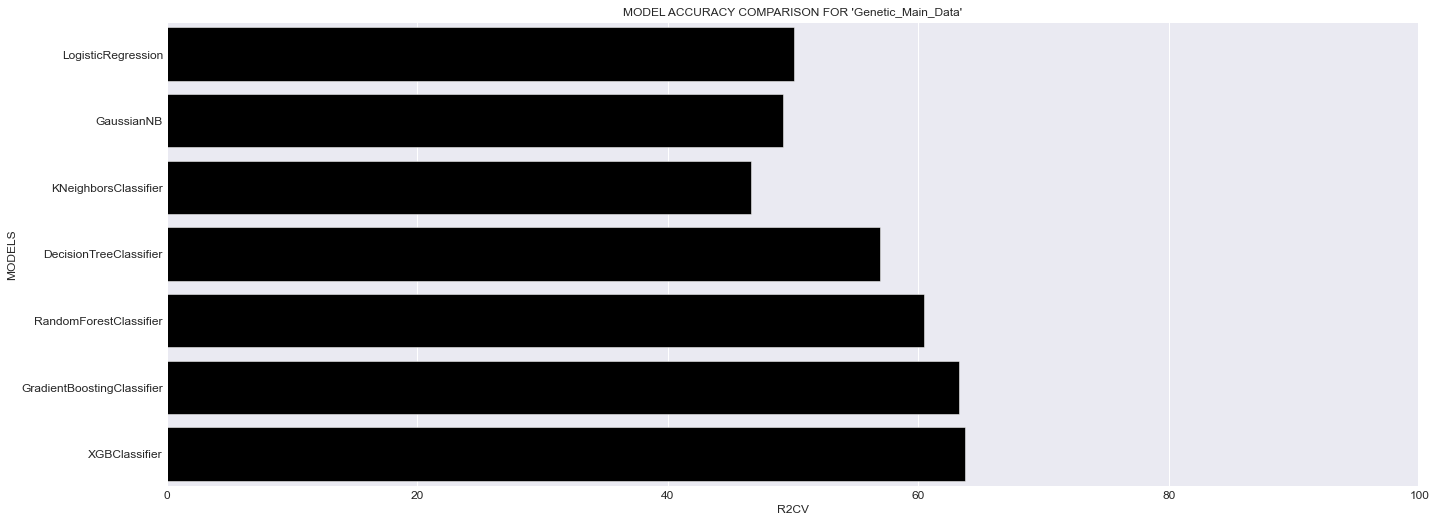

In [135]:
cvs_G = pd.DataFrame(columns=["MODELS","R2CV"])
for model in model_List_g:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,X_G_Test,Y_G_Test,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    cvs_G = cvs_G.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=cvs_G,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON FOR 'Genetic_Main_Data'")
plt.show()

[12:32:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

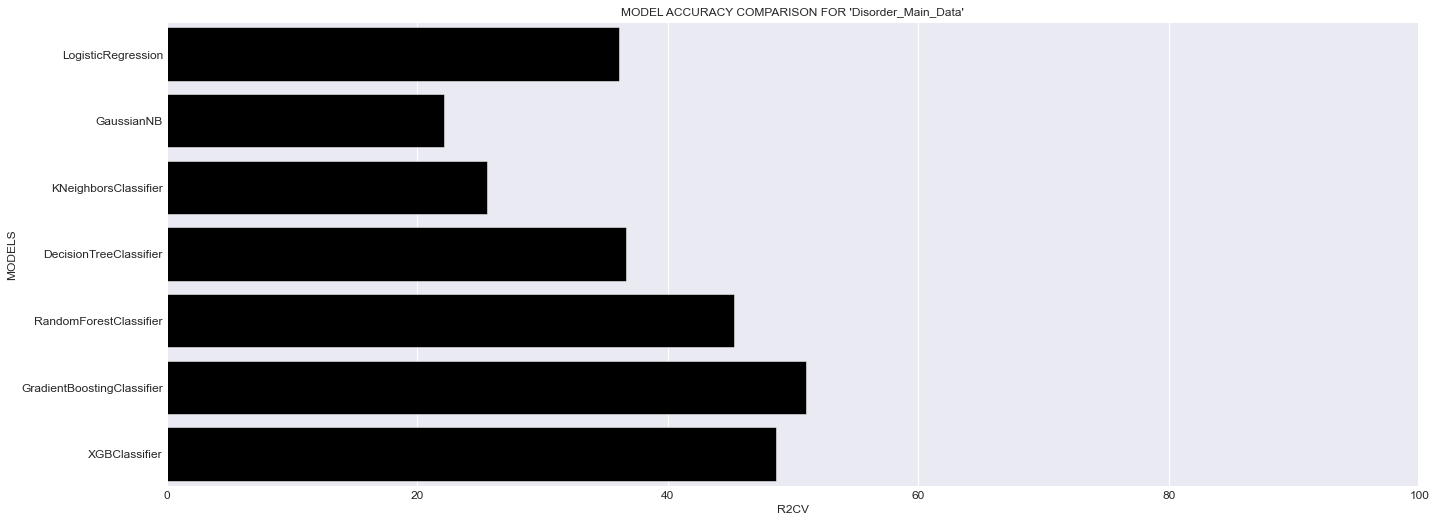

In [136]:
cvs_D = pd.DataFrame(columns=["MODELS","R2CV"])
for model in model_List_d:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,X_D_Test,Y_D_Test,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    cvs_D = cvs_D.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=cvs_D,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON FOR 'Disorder_Main_Data'")
plt.show()

[12:33:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

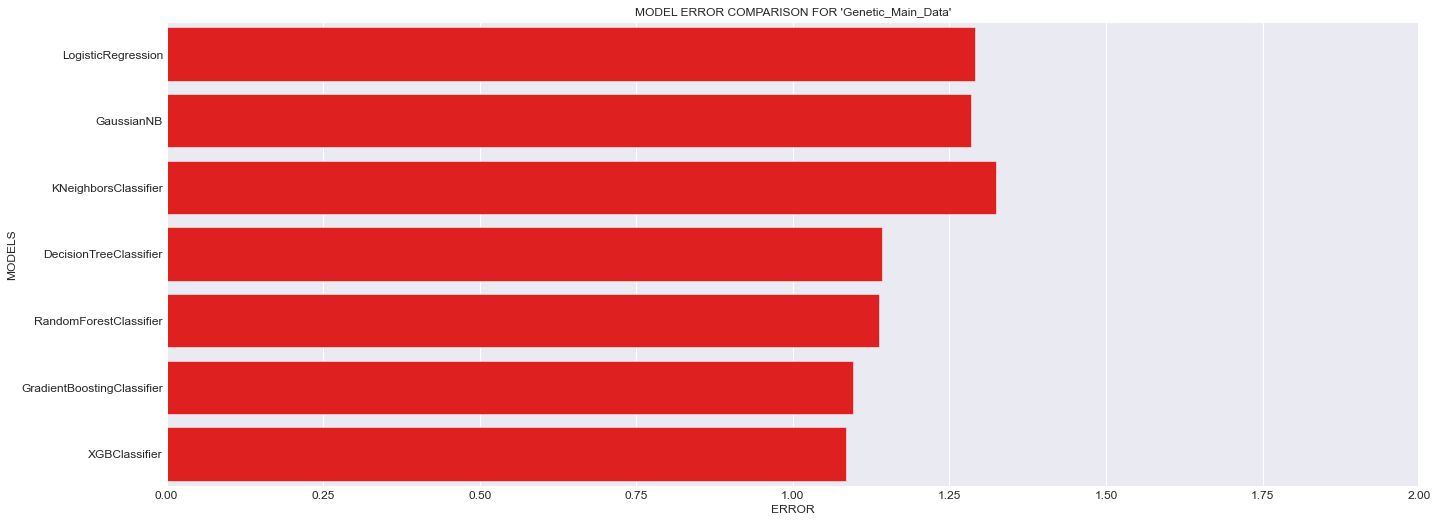

In [137]:
error_csv_G = pd.DataFrame(columns=["MODELS","error"])
for model in model_List_g:
    name = model.__class__.__name__
    error = -cross_val_score(model,X_G_Test,Y_G_Test,cv=10,scoring="neg_mean_squared_error").mean()
    result = pd.DataFrame([[name,np.sqrt(error)]],columns=["MODELS","error"])
    error_csv_G = error_csv_G.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="error",y="MODELS",data=error_csv_G,color="r")
plt.xlabel("ERROR")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON FOR 'Genetic_Main_Data'")
plt.show()

[12:34:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

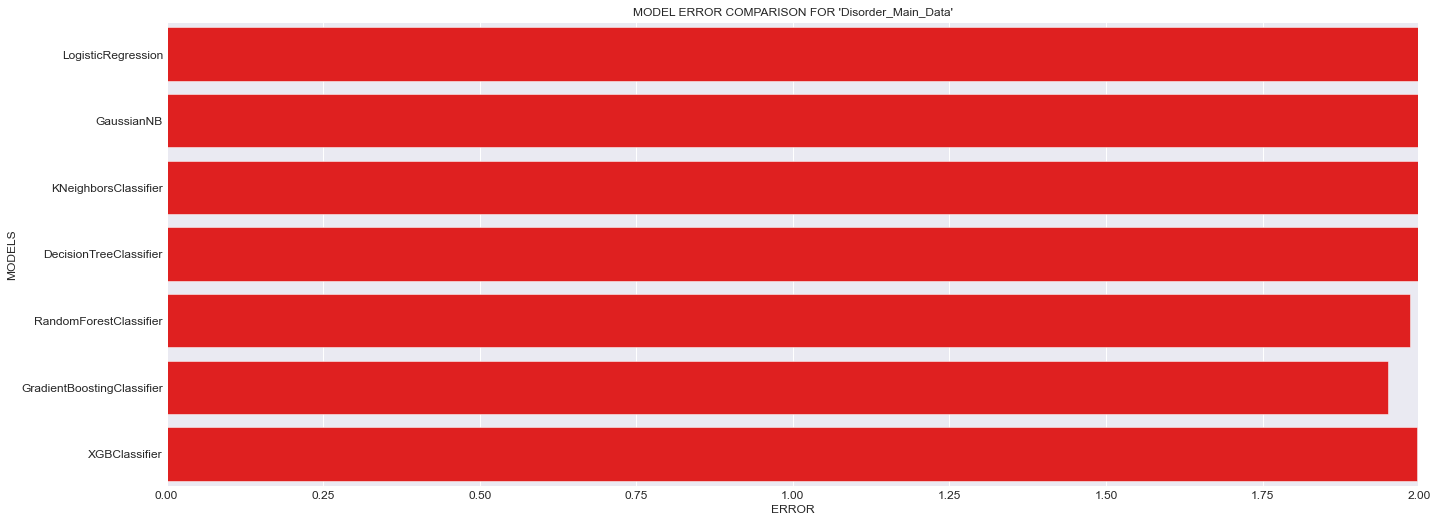

In [138]:
error_csv_D = pd.DataFrame(columns=["MODELS","error"])
for model in model_List_d:
    name = model.__class__.__name__
    error = -cross_val_score(model,X_D_Test,Y_D_Test,cv=10,scoring="neg_mean_squared_error").mean()
    result = pd.DataFrame([[name,np.sqrt(error)]],columns=["MODELS","error"])
    error_csv_D = error_csv_D.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="error",y="MODELS",data=error_csv_D,color="r")
plt.xlabel("ERROR")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON FOR 'Disorder_Main_Data'")
plt.show()

In [ ]:
## To printing the output files

In [ ]:
preds_df=pre_three_data['id']
preds_df=pd.concat([preds_df,pre_three_data['preds']],axis=1)
preds_df=pd.concat([preds_df,pre_three_data['preds_sec']],axis=1)
preds_df['id']=id_encoder.inverse_transform(preds_df['id'])
preds_df['preds']=feature43_encoder.inverse_transform(preds_df['preds'])
preds_df['preds_sec']=feature44_encoder.inverse_transform(preds_df['preds_sec'])

In [ ]:
output_colnames=['Patient Id','Genetic Disorder','Disorder Subclass']
preds_df.columns=output_colnames
preds_df.to_csv('output_final.csv',index=False)